In [1]:
import pandas as pd
import numpy as np

# 8月13号的data

In [2]:
driver_user = pd.read_excel('driver_user.xlsx')
user_driver = pd.read_excel('user_driver.xlsx')
driver_feature = pd.read_excel('driver_feature.xlsx')
user_feature = pd.read_excel('user_feature.xlsx')
order = pd.read_excel('order.xlsx')
trace_feature = pd.read_excel('order_trace_feature.xlsx')

#### get df

In [3]:
driver_feature.drop(index = (driver_feature.loc[(driver_feature.driver_id == 1775010)].index),inplace = True)

In [4]:
driver = set(driver_feature.driver_id)
user = set(user_feature.user_id)

In [5]:
temp = pd.DataFrame(columns=order.columns)
j = 0
for i in range(len(order)):
    if order.driver_id[i] in driver and order.user_id[i] in user:
        temp.loc[j] = order.iloc[i,:]
        j += 1

In [6]:
df = pd.DataFrame(columns=temp.columns)
j = 0
for i in range(len(temp)):
    if temp.order_id[i] in set(trace_feature.order_id):
        df.loc[j] = temp.iloc[i,:]
        j += 1

In [7]:
df.sort_values(by = 'order_id',inplace = True)
df.reset_index(inplace=True)

In [8]:
duplicate_index = []
for i in range(1,len(df)):
    if df.order_id[i] == df.order_id[i-1]:
        duplicate_index.append(i)

In [9]:
df.drop(duplicate_index,axis = 0,inplace=True)
df.reset_index(inplace=True)

In [10]:
len(set(df.order_id))

2343

In [12]:
driver = set(df.driver_id)
user = set(df.user_id)

# get driver user historical link

In [13]:
driver_set = set(df.driver_id)
user_set = set(df.user_id)

In [14]:
len(user_set)

2163

In [15]:
driver_id_df = pd.DataFrame(list(driver_set),columns=['driver_id'])
user_id_df = pd.DataFrame(list(user_set),columns=['user_id'])

In [16]:
driver_id_df.sort_values(by = 'driver_id',inplace = True)
user_id_df.sort_values(by = 'user_id',inplace = True)

In [17]:
driver_user_code = {}
i = 0
for index,row in driver_id_df.iterrows():
    driver_user_code[row.driver_id] = i
    i += 1

for index,row in user_id_df.iterrows():
    driver_user_code[row.user_id] = i
    i += 1

In [18]:
def strip_and_split(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.split(',')
    return x

In [19]:
driver_user.traded_user = driver_user.traded_user.apply(lambda x:strip_and_split(x))
user_driver.traded_driver = user_driver.traded_driver.apply(lambda x:strip_and_split(x))

    去掉不在抽样出的用户列表里的用户

In [20]:
for index,row in driver_user.iterrows():
    remove_set = set()
    for user in row.traded_user:
        if user and int(user) not in user_set:
            remove_set.add(user)
    for element in remove_set:
        row.traded_user.remove(element)

    去掉不在抽样出的司机列表里的司机

In [22]:
for index,row in user_driver.iterrows():
    remove_set = set()
    for driver in row.traded_driver:
        if driver and int(driver) not in driver_set:
            remove_set.add(driver)
            #row.skip2_driver_list.remove(driver)
    for element in remove_set:
        row.traded_driver.remove(element)

In [24]:
d_u_list = pd.DataFrame(columns=driver_user.columns)
j = 0
for i in range(len(driver_user)):
    if driver_user.driver_id[i] in driver_set:
        d_u_list.loc[j] = driver_user.iloc[i,:]
        j += 1

In [25]:
u_d_list = pd.DataFrame(columns=user_driver.columns)
j = 0
for i in range(len(user_driver)):
    if user_driver.user_id[i] in user_set:
        u_d_list.loc[j] = user_driver.iloc[i,:]
        j += 1

    将司机、用户id转换为他们的序号

In [26]:
for index,row in d_u_list.iterrows():
    row.driver_id = driver_user_code[row.driver_id]
    user_list = []
    for element in row.traded_user:
        user_list.append(driver_user_code[int(element)])
    row.traded_user = user_list

In [27]:
for index,row in u_d_list.iterrows():
    row.user_id = driver_user_code[row.user_id]
    driver_list = []
    for element in row.traded_driver:
        driver_list.append(driver_user_code[int(element)])
    row.traded_driver = driver_list

In [28]:
print('num of order',len(df),'\n',
      'num of driver: ',len(driver),'\n',
      'num of user: ',len(user),'\n'
      'num of user+driver',len(driver)+len(user))

num of order 2343 
 num of driver:  7 
 num of user:  8 
num of user+driver 15


## get same person link

In [29]:
driver_sp = pd.read_excel('driver_sp_list.xlsx')
user_sp = pd.read_excel('user_sp_list.xlsx')

    挑出在抽样的司机、用户列表中的司机、用户的edge1信息

In [30]:
d_sp_list = pd.DataFrame(columns=driver_sp.columns)
j = 0
for i in range(len(driver_sp)):
    if driver_sp.node_id[i] in driver_set:
        d_sp_list.loc[j] = driver_sp.iloc[i,:]
        j += 1

In [31]:
u_sp_list = pd.DataFrame(columns=user_sp.columns)
j = 0
for i in range(len(user_sp)):
    if user_sp.node_id[i] in user_set:
        u_sp_list.loc[j] = user_sp.iloc[i,:]
        j += 1

    调整数据格式

In [32]:
def strip_and_split2(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace('"','')
    x = x.split(',')
    return x

In [33]:
d_sp_list.skip2_driver_list = d_sp_list.skip2_driver_list.apply(lambda x:strip_and_split2(x))
d_sp_list.skip2_user_list = d_sp_list.skip2_user_list.apply(lambda x:strip_and_split2(x))
u_sp_list.skip2_driver_list = u_sp_list.skip2_driver_list.apply(lambda x:strip_and_split2(x))
u_sp_list.skip2_user_list = u_sp_list.skip2_user_list.apply(lambda x:strip_and_split2(x))

    去掉不在抽样出的司机列表里的司机

In [34]:
for index,row in d_sp_list.iterrows():
    remove_set = set()
    for user in row.skip2_user_list:
            if user and int(user) not in user_set:
                remove_set.add(user)
                #row.skip2_user_list.remove(user)
    for element in remove_set:
        row.skip2_user_list.remove(element)
        
for index,row in d_sp_list.iterrows():
    remove_set = set()
    for driver in row.skip2_driver_list:
        if driver and int(driver) not in driver_set:
            remove_set.add(driver)
            #row.skip2_driver_list.remove(driver)
    for element in remove_set:
        row.skip2_driver_list.remove(element)

In [35]:
for index,row in u_sp_list.iterrows():
    remove_set = set()
    for user in row.skip2_user_list:
            if user and int(user) not in user_set:
                remove_set.add(user)
                #row.skip2_user_list.remove(user)
    for element in remove_set:
        row.skip2_user_list.remove(element)
        
for index,row in u_sp_list.iterrows():
    remove_set = set()
    for driver in row.skip2_driver_list:
        if driver and int(driver) not in driver_set:
            remove_set.add(driver)
            #row.skip2_driver_list.remove(driver)
    for element in remove_set:
        row.skip2_driver_list.remove(element)

    转换为编码

In [36]:
for index,row in d_sp_list.iterrows():
    row.node_id = driver_user_code[row.node_id]
    
    spuser_list = []
    for element in row.skip2_user_list:
        if element:
            spuser_list.append(driver_user_code[int(element)])
    row.skip2_user_list = spuser_list
    
    spdriver_list = []
    for element in row.skip2_driver_list:
        if element:
            spdriver_list.append(driver_user_code[int(element)])
    row.skip2_driver_list = spdriver_list

In [37]:
for index,row in u_sp_list.iterrows():
    row.node_id = driver_user_code[row.node_id]
    
    spuser_list = []
    for element in row.skip2_user_list:
        if element:
            spuser_list.append(driver_user_code[int(element)])
    row.skip2_user_list = spuser_list
    
    spdriver_list = []
    for element in row.skip2_driver_list:
        if element:
            spdriver_list.append(driver_user_code[int(element)])
    row.skip2_driver_list = spdriver_list

In [38]:
rows_sp_d_u = []
for i, row in d_sp_list.iterrows():
    for element in row.skip2_user_list:
        if element:
            rows_sp_d_u.append((row.node_id,element))

In [39]:
rows_sp_d_d = []
for i, row in d_sp_list.iterrows():
    for element in row.skip2_driver_list:
        if element and element != row.node_id:
            rows_sp_d_d.append((row.node_id,element))

In [40]:
rows_sp_u_d = []
for i, row in u_sp_list.iterrows():
    for element in row.skip2_driver_list:
        if element:
            rows_sp_u_d.append((row.node_id,element))

In [41]:
rows_sp_u_u = []
for i, row in u_sp_list.iterrows():
    for element in row.skip2_user_list:
        if element and element != row.node_id:
            rows_sp_u_u.append((row.node_id,element))

# get graph

In [42]:
rows_d_u = []
for i, row in d_u_list.iterrows():
    for element in row.traded_user:
        rows_d_u.append((row.driver_id,element))
#d_u_df = pd.DataFrame(rows_d_u, columns=d_u_list.columns)

In [43]:
rows_u_d = []
for i, row in u_d_list.iterrows():
    for element in row.traded_driver:
        rows_u_d.append((row.user_id,element))
#u_d_df = pd.DataFrame(rows_u_d, columns=u_d_list.columns)

In [44]:
import networkx as nx

In [45]:
G = nx.Graph()
G_onlysp = nx.Graph()

In [46]:
for i in range(len(df)):
    df.driver_id[i] = driver_user_code[df.driver_id[i]]
    df.user_id[i] = driver_user_code[df.user_id[i]]

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
for i,row in df.iterrows():
    G.add_node(row.driver_id)
    G.add_node(row.user_id)

In [48]:
for i,row in df.iterrows():
    G_onlysp.add_node(row.driver_id)
    G_onlysp.add_node(row.user_id)

In [49]:
len(G.nodes)

4251

In [50]:
relation_list = rows_d_u+rows_u_d

In [51]:
i = 0
for relation in relation_list:
    G.add_edges_from([relation])
    if len(G.nodes) > 4322:
        print(relation)
        print(i)
        break
    i+=1

In [52]:
sp_relation_list = rows_sp_d_d+rows_sp_d_u+rows_sp_u_d+rows_sp_u_u
G_sp = G.copy()
for relation in sp_relation_list:
    G_sp.add_edges_from([relation])

In [53]:
i = 0
for relation in sp_relation_list:
    G_onlysp.add_edges_from([relation])
    if len(G_onlysp.nodes) > 4322:
        print(relation)
        print(i)
        break
    i+=1

In [54]:
import matplotlib.pyplot as plt

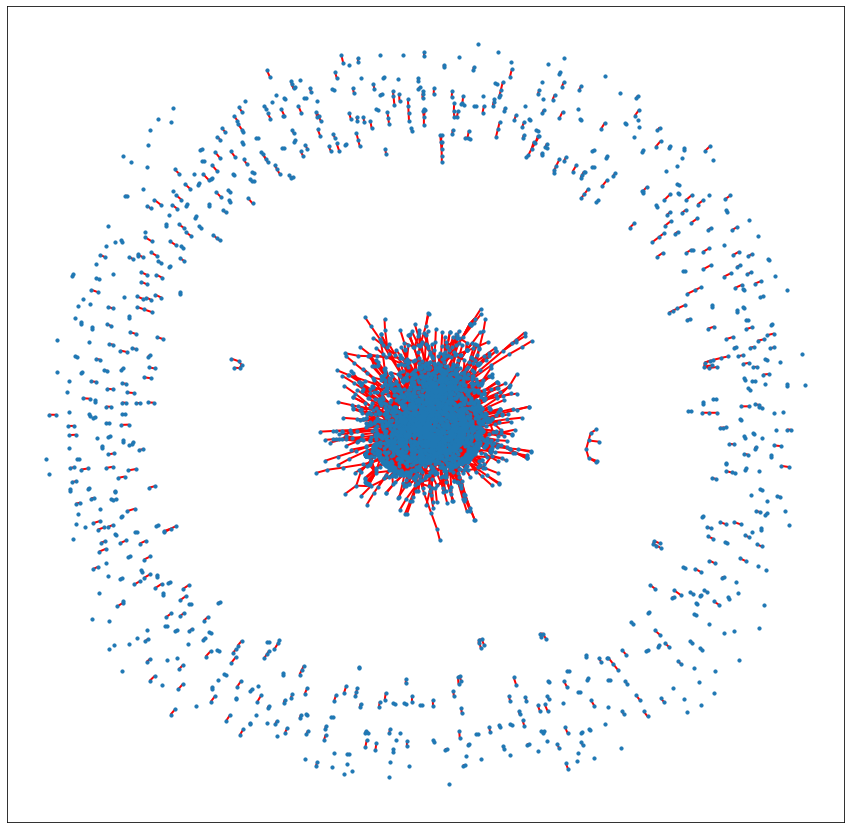

In [55]:
# 历史交易图
plt.figure(figsize=(15,15))
nx.draw_networkx(G,node_size = 10,edge_color = 'r',font_size = 7,width = 2.0,with_labels=False) 
#plt.show()

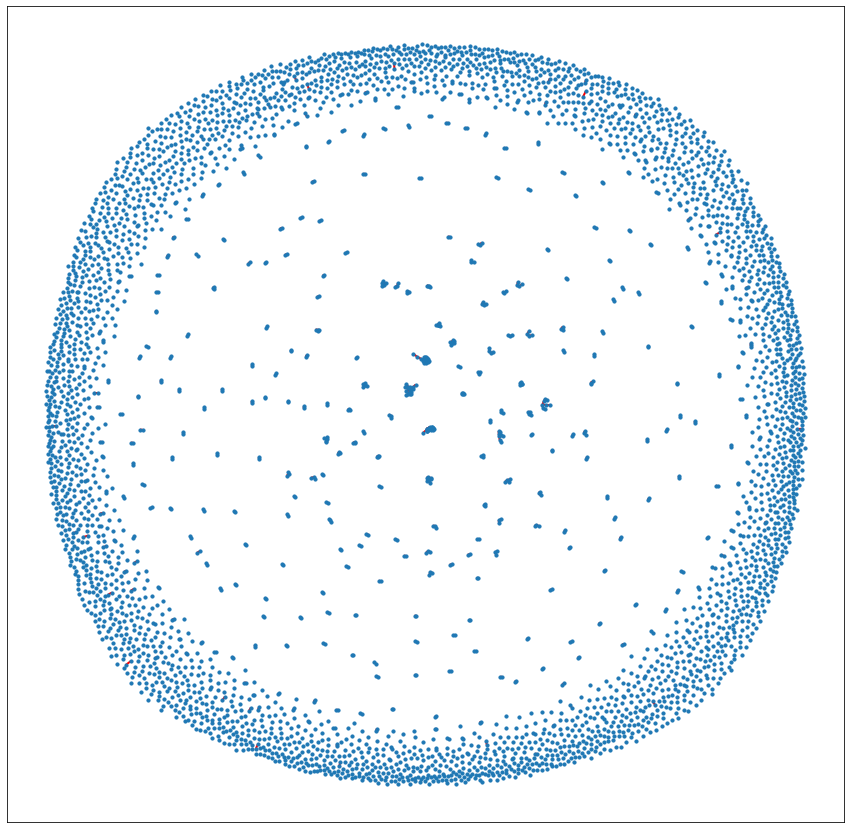

In [56]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G_onlysp,node_size = 10,edge_color = 'r',font_size = 7,width = 2.0,with_labels=False) 
#plt.show()

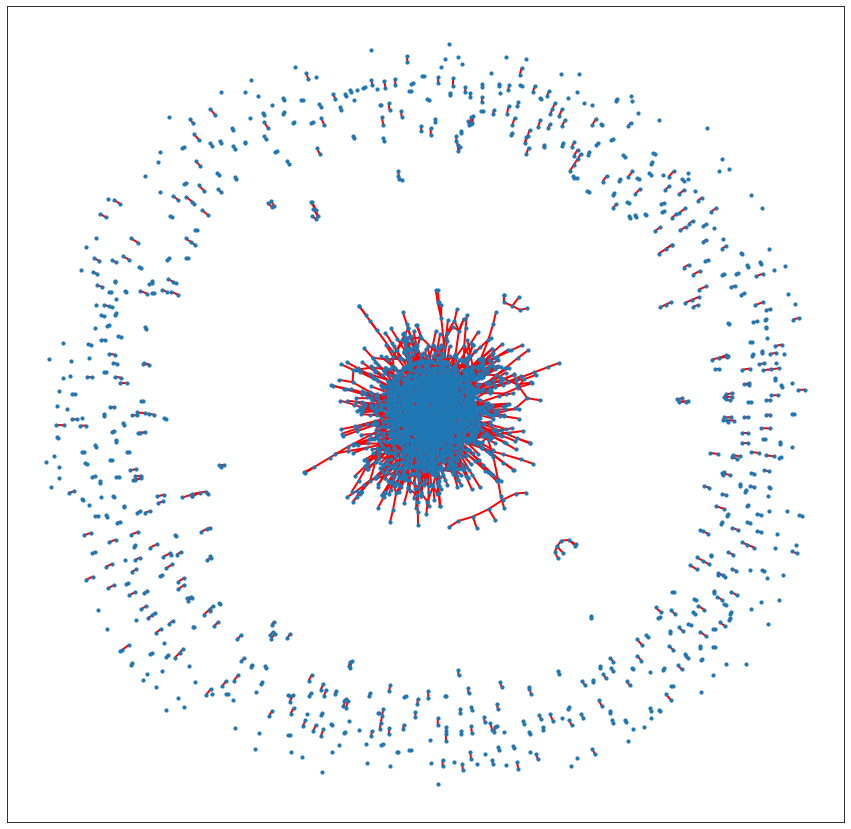

In [57]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G_sp,node_size = 10,edge_color = 'r',font_size = 7,width = 2.0,with_labels=False) 
#plt.show()

In [58]:
nx.adjacency_matrix(G_sp).nnz

11370

In [59]:
nx.adjacency_matrix(G_onlysp).nnz

1628

In [60]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [61]:
nx.adjacency_matrix(G).nnz

10510

In [62]:
nx.adjacency_matrix(G).todense().shape

(4251, 4251)

# Order Trace Feature

In [517]:
trace_feature = pd.read_excel('order_trace_feature.xlsx')

In [518]:
df_trace_feature = pd.DataFrame(columns=trace_feature.columns)
j = 0
for i in range(len(trace_feature)):
    if trace_feature.order_id[i] in set(df.order_id):
        df_trace_feature.loc[j] = trace_feature.iloc[i,:]
        j+=1

In [519]:
df_trace_feature.drop(['order_id_1','dot_ct_1','dt_1','dt'],axis=1,inplace = True)

# Low Graph Feature

In [520]:
graph_feature = df[['order_id','driver_id','user_id']].copy()

In [521]:
graph_feature['historical_transaction'] = 0
graph_feature['same_person'] = 0

In [522]:
for i in range(len(graph_feature)):
    if (graph_feature.driver_id[i],graph_feature.user_id[i]) in relation_list:
        graph_feature.historical_transaction[i] = 1

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [523]:
for i in range(len(graph_feature)):
    if (graph_feature.driver_id[i],graph_feature.user_id[i]) in sp_relation_list:
        graph_feature.same_person[i] = 1

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Combine Feature

In [524]:
feature = pd.merge(df_trace_feature,graph_feature[['order_id','user_id','driver_id','historical_transaction','same_person']],on = 'order_id')

In [525]:
feature

,order_id,real_dist,cloest_dist_to_order_start,cloest_dist_to_order_end,dot_ct,avg_gap_loc,avg_gap_time,avg_speed_lbs,max_gap_loc,max_gap_time,...,gather_points,stop_points,stop_ratio,piaoyi_points,normal_points,normal_points_ratio,user_id,driver_id,historical_transaction,same_person
0,424401218,15760,3,26,162,97.283951,10.765432,9.036697,268,185,...,51,17,0.333333,0,96,0.592593,2531,1824,0,0
1,424401773,7194,54,4,298,24.140940,10.000000,2.414094,147,20,...,201,162,0.805970,0,78,0.261745,3693,58,1,0
2,424404871,5157,0,0,389,13.257069,9.244216,1.434093,2593,15,...,387,387,1.000000,2,0,0.000000,4192,829,1,0
3,424411286,14011,204,32,449,31.204900,10.028953,3.111481,472,36,...,208,181,0.870192,0,195,0.434298,2999,969,0,0
4,424554270,19894,3,14,357,55.725490,14.599440,3.816961,650,295,...,89,2,0.022472,0,204,0.571429,2296,238,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,425063771,8584,19,69,158,54.329114,9.943038,5.464036,203,12,...,71,46,0.647887,0,81,0.512658,3785,1045,1,0
2339,425142612,620,4,13,106,5.849057,9.716981,0.601942,29,13,...,78,49,0.628205,0,12,0.113208,4067,1423,1,1
2340,424401665,2550,22,11,98,26.020408,10.010204,2.599388,138,12,...,57,40,0.701754,0,37,0.377551,3706,1884,0,0
2341,424550873,358,0,50,92,3.891304,10.010870,0.388708,55,12,...,84,60,0.714286,0,8,0.086957,4050,1100,1,0


# Get User/Driver features

In [526]:
driver_feature = pd.read_excel('driver_feature.xlsx')
user_feature = pd.read_excel('user_feature.xlsx')

In [529]:
drop_index = []
for index,row in driver_feature_df.iterrows():
    if row.driver_id not in driver_set:
        drop_index.append(index)

driver_feature_df.drop(drop_index,axis = 0,inplace = True)
driver_feature_df.reset_index(inplace = True)

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [530]:
drop_index = []
for index,row in user_feature_df.iterrows():
    if row.user_id not in user_set:
        drop_index.append(index)

user_feature_df.drop(drop_index,axis = 0,inplace = True)
user_feature_df.reset_index(inplace = True)

In [531]:
for i in range(len(driver_feature_df)):
    driver_feature_df.driver_id[i] = driver_user_code[driver_feature_df.driver_id[i]]
    
for i in range(len(user_feature_df)):
    user_feature_df.user_id[i] = driver_user_code[user_feature_df.user_id[i]]

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


# Combine All Feature

    Add label

In [532]:
label_df = df[['order_id','label']]
label_df['res'] = 0

for i in range(len(label_df)):
    if label_df.label[i] != '正常':
        label_df.res[i] = 1
        
del label_df['label']
label_df.rename(columns = {'res':'label'},inplace = True)

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [533]:
feature_with_low_graph = pd.merge(feature_with_low_graph,label_df,on = 'order_id')

In [534]:
feature_with_low_graph.shape

(2343, 60)

    Feature with node2vec graph feature

            Node2Vec get embedding

In [535]:
basic_feature = pd.merge(feature,driver_feature_df,how = 'left',on = 'driver_id')
basic_feature = pd.merge(basic_feature,user_feature_df,on = 'user_id')
basic_feature = pd.merge(basic_feature,label_df,on = 'order_id')
basic_feature.drop(['historical_transaction','same_person','index_x','index_y'],axis = 1,inplace = True)

In [536]:
total_relation = relation_list + sp_relation_list

In [537]:
row_index = []
col_index = []
for relation in total_relation:
    row_index.append(relation[0])
    col_index.append(relation[1])

In [538]:
import torch
edge_index = np.array([row_index,col_index])
edge_index = torch.from_numpy(edge_index)
edge_index

tensor([[  56,   56,   56,  ..., 3992, 3992, 3992],
        [2547, 2674, 3688,  ..., 3979, 3991, 3990]])

In [1148]:
import os.path as osp
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from torch_geometric2.nn import Node2Vec
import torch_cluster
from torch_cluster import random_walk

In [1149]:
model1 = Node2Vec(edge_index,embedding_dim=16,walk_length=20,context_size=10)

loader = model1.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)

In [541]:
device = 'cpu'
def train():
    model1.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model1.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


@torch.no_grad()
def test():
    model1.eval()
    z = model1()
    acc = model1.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask], max_iter=150)
    return acc


for epoch in range(1, 101):
    loss = train()
    #acc = test()
    #print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

Epoch: 01, Loss: 2.8688
Epoch: 02, Loss: 2.3463
Epoch: 03, Loss: 1.9866
Epoch: 04, Loss: 1.7397
Epoch: 05, Loss: 1.5559
Epoch: 06, Loss: 1.4306
Epoch: 07, Loss: 1.3277
Epoch: 08, Loss: 1.2426
Epoch: 09, Loss: 1.1825
Epoch: 10, Loss: 1.1319
Epoch: 11, Loss: 1.0935
Epoch: 12, Loss: 1.0649
Epoch: 13, Loss: 1.0355
Epoch: 14, Loss: 1.0166
Epoch: 15, Loss: 1.0007
Epoch: 16, Loss: 0.9853
Epoch: 17, Loss: 0.9733
Epoch: 18, Loss: 0.9677
Epoch: 19, Loss: 0.9569
Epoch: 20, Loss: 0.9496
Epoch: 21, Loss: 0.9468
Epoch: 22, Loss: 0.9381
Epoch: 23, Loss: 0.9340
Epoch: 24, Loss: 0.9289
Epoch: 25, Loss: 0.9280
Epoch: 26, Loss: 0.9210
Epoch: 27, Loss: 0.9215
Epoch: 28, Loss: 0.9175
Epoch: 29, Loss: 0.9143
Epoch: 30, Loss: 0.9137
Epoch: 31, Loss: 0.9121
Epoch: 32, Loss: 0.9085
Epoch: 33, Loss: 0.9053
Epoch: 34, Loss: 0.9034
Epoch: 35, Loss: 0.9026
Epoch: 36, Loss: 0.9025
Epoch: 37, Loss: 0.8997
Epoch: 38, Loss: 0.8992
Epoch: 39, Loss: 0.8975
Epoch: 40, Loss: 0.8962
Epoch: 41, Loss: 0.8946
Epoch: 42, Loss:

In [1150]:
loss_ls = []
for epoch in range(1, 101):
    loss = train()
    #acc = test()
    #print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')
    loss_ls.append(loss)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

Epoch: 01, Loss: 2.8361
Epoch: 02, Loss: 2.3168
Epoch: 03, Loss: 1.9794
Epoch: 04, Loss: 1.7318
Epoch: 05, Loss: 1.5582
Epoch: 06, Loss: 1.4320
Epoch: 07, Loss: 1.3342
Epoch: 08, Loss: 1.2482
Epoch: 09, Loss: 1.1838
Epoch: 10, Loss: 1.1295
Epoch: 11, Loss: 1.0983
Epoch: 12, Loss: 1.0580
Epoch: 13, Loss: 1.0359
Epoch: 14, Loss: 1.0088
Epoch: 15, Loss: 0.9937
Epoch: 16, Loss: 0.9837
Epoch: 17, Loss: 0.9732
Epoch: 18, Loss: 0.9616
Epoch: 19, Loss: 0.9574
Epoch: 20, Loss: 0.9468
Epoch: 21, Loss: 0.9455
Epoch: 22, Loss: 0.9352
Epoch: 23, Loss: 0.9309
Epoch: 24, Loss: 0.9251
Epoch: 25, Loss: 0.9237
Epoch: 26, Loss: 0.9212
Epoch: 27, Loss: 0.9160
Epoch: 28, Loss: 0.9153
Epoch: 29, Loss: 0.9133
Epoch: 30, Loss: 0.9081
Epoch: 31, Loss: 0.9073
Epoch: 32, Loss: 0.9050
Epoch: 33, Loss: 0.9048
Epoch: 34, Loss: 0.8993
Epoch: 35, Loss: 0.9022
Epoch: 36, Loss: 0.9013
Epoch: 37, Loss: 0.8975
Epoch: 38, Loss: 0.8970
Epoch: 39, Loss: 0.8958
Epoch: 40, Loss: 0.8959
Epoch: 41, Loss: 0.8941
Epoch: 42, Loss:

In [1184]:
yticks = list(np.arange(0.5,3,0.1))
yticks.insert(4,0.88)
yticks

[0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.88,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999,
 1.1999999999999997,
 1.2999999999999998,
 1.4,
 1.4999999999999998,
 1.5999999999999996,
 1.6999999999999997,
 1.7999999999999998,
 1.8999999999999997,
 1.9999999999999996,
 2.0999999999999996,
 2.1999999999999997,
 2.3,
 2.3999999999999995,
 2.4999999999999996,
 2.5999999999999996,
 2.6999999999999993,
 2.7999999999999994,
 2.8999999999999995]

([<matplotlib.axis.YTick at 0x1a4c23da10>,
 <a list of 26 Text yticklabel objects>)

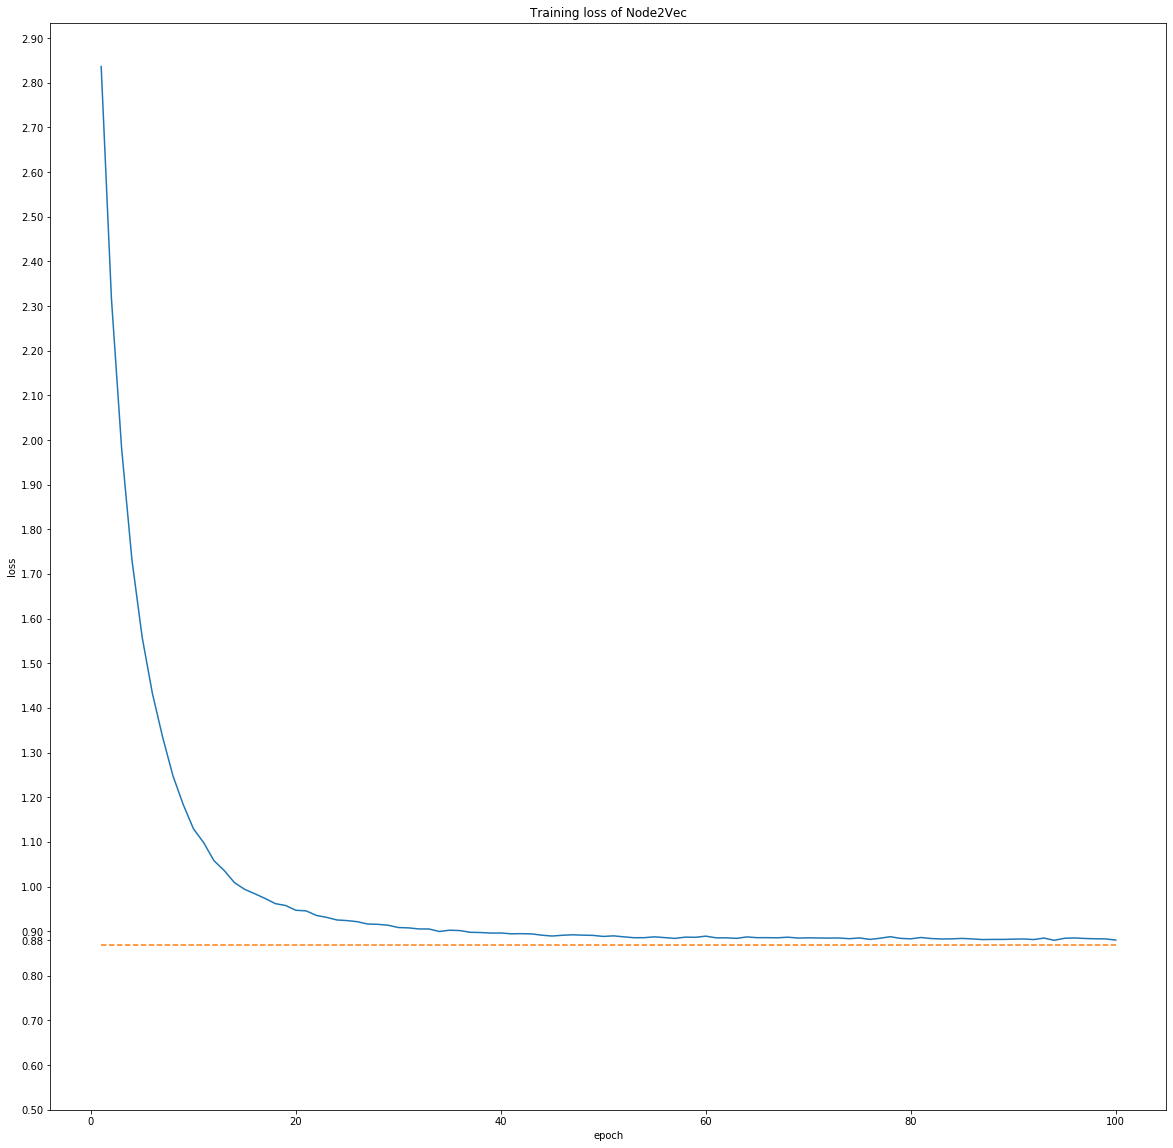

In [1188]:
plt.figure(figsize = (20,20))
plt.plot(range(1,101),loss_ls)
plt.plot(range(1,101),[0.87]*100,linestyle='--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss of Node2Vec')
plt.yticks(yticks)

In [542]:
node2vec_embed = model1.embedding.weight.detach().numpy()

In [543]:
embedding_feature = pd.DataFrame(node2vec_embed,columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16'])
# embedding_feature = pd.DataFrame(node2vec_embed,columns = ['V1','V2','V3','V4','V5','V6','V7','V8'])
embedding_feature['node_id'] = range(0,4251)
embedding_feature = embedding_feature[['node_id','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16']]

In [544]:
feature_with_node2vec = pd.merge(basic_feature,embedding_feature,how = 'left',left_on = 'driver_id',right_on='node_id')
feature_with_node2vec = pd.merge(feature_with_node2vec,embedding_feature,
                                 how = 'left',left_on = 'user_id',right_on='node_id')

    Feature with low graph feature

In [545]:
low_graph_feature = graph_feature[['order_id','historical_transaction','same_person']]

In [546]:
feature_with_low_graph = pd.merge(basic_feature,low_graph_feature,how = 'left',on = 'order_id')

    Metapath2Vec get embedding

In [547]:
row_index = []
col_index = []
for relation in total_relation:
    row_index.append(relation[0])
    col_index.append(relation[1])
    
trade_edge_index = np.array([row_index,col_index])
trade_edge_index = torch.from_numpy(trade_edge_index)
trade_edge_index

tensor([[  56,   56,   56,  ..., 3992, 3992, 3992],
        [2547, 2674, 3688,  ..., 3979, 3991, 3990]])

In [548]:
row_d_u = []
col_d_u = []
row_u_d = []
col_u_d = []
for relation in relation_list:
    if relation[0] < 2088 :
        row_d_u.append(relation[0])
        col_d_u.append(relation[1])
    if relation[0] >= 2088 :
        row_u_d.append(relation[0])
        col_u_d.append(relation[1])
        
driver_user_trade = torch.from_numpy(np.array([row_d_u,col_d_u]))
user_driver_trade = torch.from_numpy(np.array([row_u_d,col_u_d]))

In [549]:
sp_row_d_d = []
sp_col_d_d = []
sp_row_d_u = []
sp_col_d_u = []
sp_row_u_u = []
sp_col_u_u = []
sp_row_u_d = []
sp_col_u_d = []
for relation in sp_relation_list:
    if relation[0] < 2088 :
        if relation[1] < 2088 :
            sp_row_d_d.append(relation[0])
            sp_col_d_d.append(relation[1])
    if relation[0] < 2088 :
        if relation[1] >= 2088:
            sp_row_d_u.append(relation[0])
            sp_col_d_u.append(relation[1])
    if relation[0] >= 2088 :
        if relation[1] >= 2088 :
            sp_row_u_u.append(relation[0])
            sp_col_u_u.append(relation[1])
    if relation[0] >= 2088 :
        if relation[1] < 2088:
            sp_row_u_d.append(relation[0])
            sp_col_u_d.append(relation[1])
        
driver_driver_sp = torch.from_numpy(np.array([sp_row_d_d,sp_col_d_d]))
driver_user_sp = torch.from_numpy(np.array([sp_row_d_u,sp_col_d_u]))
user_user_sp = torch.from_numpy(np.array([sp_row_u_u,sp_col_u_u]))
user_driver_sp = torch.from_numpy(np.array([sp_row_u_d,sp_col_u_d]))

In [550]:
for i in range(len(driver_user_trade[1])):
    driver_user_trade[1][i] = driver_user_trade[1][i] -2088
    
for i in range(len(user_driver_trade[0])):
    user_driver_trade[0][i] = user_driver_trade[0][i] -2088
    
for i in range(len(driver_user_sp[1])):
    driver_user_sp[1][i] = driver_user_sp[1][i] -2088
    
for i in range(len(user_driver_sp[0])):
    user_driver_sp[0][i] = user_driver_sp[0][i] -2088
    
for i in range(len(user_user_sp[1])):
    user_user_sp[1][i] = user_user_sp[1][i] -2088
    user_user_sp[0][i] = user_user_sp[0][i] -2088

In [551]:
edge_index_dict = {
    ('driver','served with', 'user'):driver_user_trade,
    ('user','served by','driver'):user_driver_trade,
    ('driver','is sp to','user'):driver_user_sp,
    ('user','is sp by','driver'):user_driver_sp,
    ('driver','is sp','driver'):driver_driver_sp,
    ('user','sp','user'):user_user_sp
}

In [1154]:
from torch_geometric.nn import MetaPath2Vec

In [1155]:
metapath = [
    ('driver', 'served with', 'user'),
    ('user','served by','driver')
]

# metapath = [
#     ('driver', 'is sp to', 'user'),
#     ('user','is sp by','driver')
# ]

In [1161]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model2 = MetaPath2Vec(edge_index_dict, embedding_dim=16,
                     metapath=metapath, walk_length=20, context_size=10,
                     walks_per_node=5, num_negative_samples=5,
                     num_nodes_dict = {'driver':2088,'user':2163},
                     sparse=True).to(device)

loader = model2.loader(batch_size=128, shuffle=True, num_workers=0)
optimizer = torch.optim.SparseAdam(model2.parameters(), lr=0.01)

In [555]:
def train(epoch, log_steps=17, eval_steps=10):
    model2.train()

    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        optimizer.zero_grad()
        loss = model2.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if (i + 1) % log_steps == 0:
            print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                   f'Loss: {total_loss / log_steps:.4f}'))
            total_loss = 0

In [556]:
for epoch in range(1, 101):
    train(epoch)
#     acc = test()
#     print(f'Epoch: {epoch}, Accuracy: {acc:.4f}')

Epoch: 1, Step: 00017/17, Loss: 2.8980
Epoch: 2, Step: 00017/17, Loss: 2.4417
Epoch: 3, Step: 00017/17, Loss: 2.0945
Epoch: 4, Step: 00017/17, Loss: 1.8343
Epoch: 5, Step: 00017/17, Loss: 1.6417
Epoch: 6, Step: 00017/17, Loss: 1.4951
Epoch: 7, Step: 00017/17, Loss: 1.3785
Epoch: 8, Step: 00017/17, Loss: 1.2892
Epoch: 9, Step: 00017/17, Loss: 1.2134
Epoch: 10, Step: 00017/17, Loss: 1.1593
Epoch: 11, Step: 00017/17, Loss: 1.1176
Epoch: 12, Step: 00017/17, Loss: 1.0843
Epoch: 13, Step: 00017/17, Loss: 1.0555
Epoch: 14, Step: 00017/17, Loss: 1.0353
Epoch: 15, Step: 00017/17, Loss: 1.0183
Epoch: 16, Step: 00017/17, Loss: 1.0034
Epoch: 17, Step: 00017/17, Loss: 0.9904
Epoch: 18, Step: 00017/17, Loss: 0.9814
Epoch: 19, Step: 00017/17, Loss: 0.9712
Epoch: 20, Step: 00017/17, Loss: 0.9637
Epoch: 21, Step: 00017/17, Loss: 0.9555
Epoch: 22, Step: 00017/17, Loss: 0.9500
Epoch: 23, Step: 00017/17, Loss: 0.9461
Epoch: 24, Step: 00017/17, Loss: 0.9412
Epoch: 25, Step: 00017/17, Loss: 0.9373
Epoch: 26

In [1162]:
def train_loss(epoch, log_steps=17, eval_steps=10):
    model2.train()

    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        optimizer.zero_grad()
        loss = model2.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if (i + 1) % log_steps == 0:
            print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                   f'Loss: {total_loss / log_steps:.4f}'))
            return total_loss / log_steps

In [1163]:
loss_ls_meta = []
for epoch in range(1, 101):
    loss_ls_meta.append(train_loss(epoch))

Epoch: 1, Step: 00017/17, Loss: 2.9932
Epoch: 2, Step: 00017/17, Loss: 2.5047
Epoch: 3, Step: 00017/17, Loss: 2.1473
Epoch: 4, Step: 00017/17, Loss: 1.8801
Epoch: 5, Step: 00017/17, Loss: 1.6790
Epoch: 6, Step: 00017/17, Loss: 1.5176
Epoch: 7, Step: 00017/17, Loss: 1.4011
Epoch: 8, Step: 00017/17, Loss: 1.3092
Epoch: 9, Step: 00017/17, Loss: 1.2327
Epoch: 10, Step: 00017/17, Loss: 1.1748
Epoch: 11, Step: 00017/17, Loss: 1.1321
Epoch: 12, Step: 00017/17, Loss: 1.0977
Epoch: 13, Step: 00017/17, Loss: 1.0694
Epoch: 14, Step: 00017/17, Loss: 1.0476
Epoch: 15, Step: 00017/17, Loss: 1.0285
Epoch: 16, Step: 00017/17, Loss: 1.0125
Epoch: 17, Step: 00017/17, Loss: 1.0005
Epoch: 18, Step: 00017/17, Loss: 0.9891
Epoch: 19, Step: 00017/17, Loss: 0.9806
Epoch: 20, Step: 00017/17, Loss: 0.9711
Epoch: 21, Step: 00017/17, Loss: 0.9652
Epoch: 22, Step: 00017/17, Loss: 0.9584
Epoch: 23, Step: 00017/17, Loss: 0.9539
Epoch: 24, Step: 00017/17, Loss: 0.9477
Epoch: 25, Step: 00017/17, Loss: 0.9427
Epoch: 26

In [1181]:
yticks = list(np.arange(0.5,3,0.1))
yticks.insert(4,0.87)
yticks

[0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.87,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999,
 1.1999999999999997,
 1.2999999999999998,
 1.4,
 1.4999999999999998,
 1.5999999999999996,
 1.6999999999999997,
 1.7999999999999998,
 1.8999999999999997,
 1.9999999999999996,
 2.0999999999999996,
 2.1999999999999997,
 2.3,
 2.3999999999999995,
 2.4999999999999996,
 2.5999999999999996,
 2.6999999999999993,
 2.7999999999999994,
 2.8999999999999995]

([<matplotlib.axis.YTick at 0x1a5398d150>,
 <a list of 26 Text yticklabel objects>)

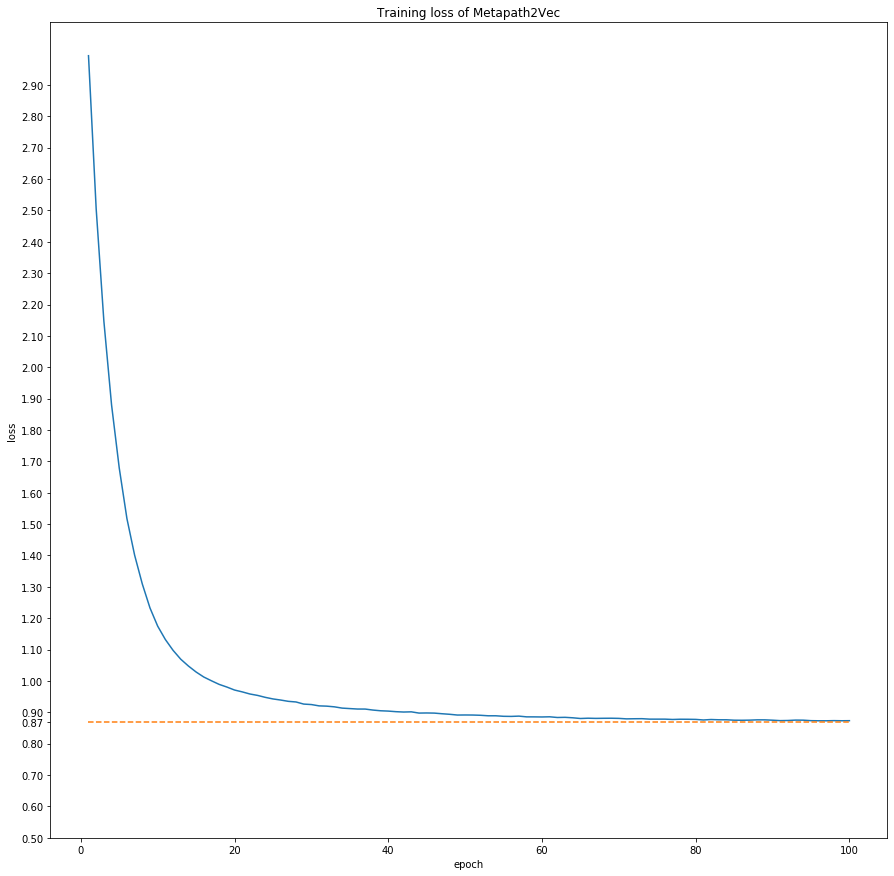

In [1183]:
yticks = list(np.arange(0.5,3,0.1))
yticks.insert(4,0.87)
yticks
plt.figure(figsize = (15,15))
plt.plot(range(1,101),loss_ls_meta)
plt.plot(range(1,101),[0.87]*100,linestyle='--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss of Metapath2Vec')
plt.yticks(yticks)

In [557]:
metapath2vec_embed = model2.embedding.weight.detach().numpy()

In [558]:
metapath2vec_embed.shape

(4251, 16)

In [559]:
meta_embedding_feature = pd.DataFrame(metapath2vec_embed,columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16'])
# meta_embedding_feature = pd.DataFrame(metapath2vec_embed,columns = ['V1','V2','V3','V4','V5','V6','V7','V8'])
meta_embedding_feature['node_id'] = range(0,4251)
meta_embedding_feature = meta_embedding_feature[['node_id','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16']]
# meta_embedding_feature = meta_embedding_feature[['node_id','V1','V2','V3','V4','V5','V6','V7','V8']]

In [560]:
feature_with_metapath2vec = pd.merge(basic_feature,meta_embedding_feature,how = 'left',left_on = 'driver_id',right_on='node_id')
feature_with_metapath2vec = pd.merge(feature_with_metapath2vec,meta_embedding_feature,
                                 how = 'left',left_on = 'user_id',right_on='node_id')

# Process Feature

    low graph feature

In [561]:
# 填缺失
feature_with_low_graph[feature_with_low_graph.stop_ratio.isnull()]
feature_with_low_graph.at[1143,'stop_ratio'] = 0

In [563]:
for column in feature_with_low_graph.columns:
    feature_with_low_graph[column] = pd.to_numeric(feature_with_low_graph[column],errors='coerce')

    node2vec embedding

In [564]:
#feature_with_node2vec[feature_with_node2vec.stop_ratio.isnull()]
feature_with_node2vec.at[1041,'stop_ratio'] = 0

In [565]:
for column in feature_with_node2vec.columns:
    feature_with_node2vec[column] = pd.to_numeric(feature_with_node2vec[column],errors='coerce')

    metapath2vec embedding

In [566]:
#feature_with_metapath2vec[feature_with_metapath2vec.stop_ratio.isnull()]
feature_with_metapath2vec.at[1041,'stop_ratio'] = 0

In [567]:
for column in feature_with_metapath2vec.columns:
    feature_with_metapath2vec[column] = pd.to_numeric(feature_with_metapath2vec[column],errors='coerce')

#  Train  a  simple classifier

    low 

In [1100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [1101]:
len(feature_with_low_graph.columns)

59

In [1102]:
X_train,X_test, y_train, y_test =train_test_split(feature_with_low_graph.drop(['order_id','user_id','driver_id','label'],axis = 1),feature_with_low_graph['label'],test_size=0.3,random_state=89)

In [1103]:
model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
model.fit(X_train, y_train)  
test_score = model.score(X_test, y_test)
print('test_score: {0}'.format(test_score))

test_score: 0.8150782361308677


In [1104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [1105]:
roc_auc_score(y_test,model.predict(X_test))

0.8172803814161087

In [1106]:
f1_score(y_test,model.predict(X_test))

0.8402948402948403

In [1107]:
recall_score(y_test,model.predict(X_test))

0.8066037735849056

In [1108]:
test_label_df = pd.merge(feature_with_low_graph[['order_id','label']].iloc[list(y_test.index)],temp_df.drop_duplicates(),how = 'left',on = 'order_id')
for order_id in list(test_label_df.order_id.value_counts().index[test_label_df.order_id.value_counts()>1]):
    index = test_label_df[test_label_df.order_id == order_id][test_label_df[test_label_df.order_id == order_id].label_y == '同伙'].index
    test_label_df.drop(index,axis = 0,inplace = True)
y_pred = model.predict(X_test)
test_label_df['y_pred'] = y_pred
true = test_label_df[test_label_df.label_y != 'gang'].label_x
pred = test_label_df[test_label_df.label_y != 'gang'].y_pred
print('对于现有策略能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略能查出的,recall ：',recall_score(true,pred))
true = test_label_df[test_label_df.label_y != '现有检测出的'].label_x
pred = test_label_df[test_label_df.label_y != '现有检测出的'].y_pred
print('对于现有策略不能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略不能查出的,recall ：',recall_score(true,pred))

对于现有策略能查出的,acc ： 0.8506224066390041
对于现有策略能查出的,recall ： 0.8817733990147784
对于现有策略不能查出的,acc ： 0.788
对于现有策略不能查出的,recall ： 0.7375565610859729


    node2vec

In [1110]:
X_train,X_test, y_train, y_test =train_test_split(feature_with_node2vec.drop(['order_id','user_id','driver_id','label','node_id_x','node_id_y'],axis = 1),
                                                  feature_with_node2vec['label'],
                                                  test_size=0.3,random_state=89)

In [1111]:
model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
model.fit(X_train, y_train) 
test_score = model.score(X_test, y_test)
print('test_score: {0}'.format(test_score))

test_score: 0.8165007112375533


In [1112]:
roc_auc_score(y_test,model.predict(X_test))

0.8153952796375196

In [1113]:
f1_score(y_test,model.predict(X_test))

0.8436363636363637

In [1114]:
recall_score(y_test,model.predict(X_test))

0.8207547169811321

In [1115]:
test_label_df = pd.merge(feature_with_node2vec[['order_id','label']].iloc[list(y_test.index)],temp_df.drop_duplicates(),how = 'left',on = 'order_id')
for order_id in list(test_label_df.order_id.value_counts().index[test_label_df.order_id.value_counts()>1]):
    index = test_label_df[test_label_df.order_id == order_id][test_label_df[test_label_df.order_id == order_id].label_y == '同伙'].index
    test_label_df.drop(index,axis = 0,inplace = True)
y_pred = model.predict(X_test)
test_label_df['y_pred'] = y_pred
true = test_label_df[test_label_df.label_y != 'gang'].label_x
pred = test_label_df[test_label_df.label_y != 'gang'].y_pred
print('对于现有策略能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略能查出的,recall ：',recall_score(true,pred))
true = test_label_df[test_label_df.label_y != '现有检测出的'].label_x
pred = test_label_df[test_label_df.label_y != '现有检测出的'].y_pred
print('对于现有策略不能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略不能查出的,recall ：',recall_score(true,pred))

对于现有策略能查出的,acc ： 0.8443983402489627
对于现有策略能查出的,recall ： 0.8916256157635468
对于现有策略不能查出的,acc ： 0.786
对于现有策略不能查出的,recall ： 0.755656108597285


    metapath2vec

In [1117]:
X_train,X_test, y_train, y_test =train_test_split(feature_with_metapath2vec.drop(['order_id','user_id','driver_id','label'],axis = 1),
                                                  feature_with_metapath2vec['label'],
                                                  test_size=0.3,random_state=89)

In [1118]:
model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
model.fit(X_train, y_train) 
test_score = model.score(X_test, y_test)
print('test_score: {0}'.format(test_score))

test_score: 0.8193456614509246


In [1119]:
roc_auc_score(y_test,model.predict(X_test))

0.8214309866774869

In [1120]:
f1_score(y_test,model.predict(X_test))

0.8441717791411043

In [1121]:
recall_score(y_test,model.predict(X_test))

0.8113207547169812

In [1122]:
test_label_df = pd.merge(feature_with_metapath2vec[['order_id','label']].iloc[list(y_test.index)],temp_df.drop_duplicates(),how = 'left',on = 'order_id')
for order_id in list(test_label_df.order_id.value_counts().index[test_label_df.order_id.value_counts()>1]):
    index = test_label_df[test_label_df.order_id == order_id][test_label_df[test_label_df.order_id == order_id].label_y == '同伙'].index
    test_label_df.drop(index,axis = 0,inplace = True)
y_pred = model.predict(X_test)
test_label_df['y_pred'] = y_pred
true = test_label_df[test_label_df.label_y != 'gang'].label_x
pred = test_label_df[test_label_df.label_y != 'gang'].y_pred
print('对于现有策略能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略能查出的,recall ：',recall_score(true,pred))
true = test_label_df[test_label_df.label_y != '现有检测出的'].label_x
pred = test_label_df[test_label_df.label_y != '现有检测出的'].y_pred
print('对于现有策略不能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略不能查出的,recall ：',recall_score(true,pred))

对于现有策略能查出的,acc ： 0.8609958506224067
对于现有策略能查出的,recall ： 0.9014778325123153
对于现有策略不能查出的,acc ： 0.786
对于现有策略不能查出的,recall ： 0.7285067873303167


# node2vec 、 metapath2vec 调参

In [ ]:
def train_xgb_baseon_node2vec_feature(dim=16,walk_length=20,context_size=10):
    model1 = Node2Vec(edge_index,embedding_dim=dim,walk_length=walk_length,context_size=context_size)

    loader = model1.loader(batch_size=128, shuffle=True, num_workers=4)
    optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
    device = 'cpu'
    def train():
        model1.train()
        total_loss = 0
        for pos_rw, neg_rw in loader:
            optimizer.zero_grad()
            loss = model1.loss(pos_rw.to(device), neg_rw.to(device))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        return total_loss / len(loader)


    @torch.no_grad()
    def test():
        model1.eval()
        z = model1()
        acc = model1.test(z[data.train_mask], data.y[data.train_mask],
                         z[data.test_mask], data.y[data.test_mask], max_iter=150)
        return acc


    for epoch in range(1, 101):
        loss = train()
        #acc = test()
        #print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')
        #print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

    node2vec_embed = model1.embedding.weight.detach().numpy()
    embedding_feature = pd.DataFrame(node2vec_embed)
    embedding_feature['node_id'] = range(0,4251)
    feature_with_node2vec = pd.merge(feature,embedding_feature,how = 'left',left_on = 'driver_id',right_on='node_id')
    feature_with_node2vec = pd.merge(feature_with_node2vec,embedding_feature,
                                     how = 'left',left_on = 'user_id',right_on='node_id')
    feature_with_node2vec = pd.merge(feature_with_node2vec,label_df,on = 'order_id')

    feature_with_node2vec.at[1041,'stop_ratio'] = 0
    for column in ['real_dist','cloest_dist_to_order_end','cloest_dist_to_order_start','dot_ct','max_gap_loc',
                           'max_gap_time','180s_loss_count','cnt_start','cnt_end','gather_points','stop_points','piaoyi_points',
                          'normal_points']:
        feature_with_node2vec[column] = pd.to_numeric(feature_with_node2vec[column],errors='coerce')
        
    X_train = feature_with_node2vec.drop(['order_id','user_id','driver_id','label'],axis = 1).iloc[0:1640,:]
    y_train = feature_with_node2vec['label'][0:1640]
    X_test = feature_with_node2vec.drop(['order_id','user_id','driver_id','label'],axis = 1).iloc[1640:,:]
    y_test = feature_with_node2vec['label'][1640:]

    model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
    model.fit(X_train, y_train) 
    test_score = model.score(X_test, y_test)
    return test_score

In [ ]:
def train_xgb_baseon_metapath2vec_feature(dim=16,walk_length=20,context_size=10):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model2 = MetaPath2Vec(edge_index_dict, embedding_dim=dim,
                         metapath=metapath, walk_length=walk_length, context_size=context_size,
                         walks_per_node=5, num_negative_samples=5,
                         num_nodes_dict = {'driver':2088,'user':2163},
                         sparse=True).to(device)

    loader = model2.loader(batch_size=128, shuffle=True, num_workers=0)
    optimizer = torch.optim.SparseAdam(model2.parameters(), lr=0.01)
    def train(epoch, log_steps=17, eval_steps=10):
        model2.train()

        total_loss = 0
        for i, (pos_rw, neg_rw) in enumerate(loader):
            optimizer.zero_grad()
            loss = model2.loss(pos_rw.to(device), neg_rw.to(device))
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            if (i + 1) % log_steps == 0:
                print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                       f'Loss: {total_loss / log_steps:.4f}'))
                total_loss = 0

    for epoch in range(1, 101):
        train(epoch)

    metapath2vec_embed = model2.embedding.weight.detach().numpy()
    meta_embedding_feature = pd.DataFrame(metapath2vec_embed4)
    meta_embedding_feature['node_id'] = range(0,4251)
    feature_with_metapath2vec = pd.merge(feature,meta_embedding_feature,how = 'left',left_on = 'driver_id',right_on='node_id')
    feature_with_metapath2vec = pd.merge(feature_with_metapath2vec,meta_embedding_feature,
                                     how = 'left',left_on = 'user_id',right_on='node_id')
    feature_with_metapath2vec = pd.merge(feature_with_metapath2vec,label_df,on = 'order_id')

    feature_with_metapath2vec.at[1041,'stop_ratio'] = 0
    for column in ['real_dist','cloest_dist_to_order_end','cloest_dist_to_order_start','dot_ct','max_gap_loc',
                           'max_gap_time','180s_loss_count','cnt_start','cnt_end','gather_points','stop_points','piaoyi_points',
                          'normal_points']:
        feature_with_metapath2vec[column] = pd.to_numeric(feature_with_metapath2vec[column],errors='coerce')

    X_train = feature_with_metapath2vec.drop(['order_id','user_id','driver_id','label'],axis = 1).iloc[0:1640,:]
    y_train = feature_with_metapath2vec['label'][0:1640]
    X_test = feature_with_metapath2vec.drop(['order_id','user_id','driver_id','label'],axis = 1).iloc[1640:,:]
    y_test = feature_with_metapath2vec['label'][1640:]
    model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
    model.fit(X_train, y_train) 
    test_score = model.score(X_test, y_test)
    
    return test_score

In [287]:
for dim in [16,32,64]:
    score = 0
    for i in range(10):
        score += train_xgb_baseon_node2vec_feature(dim=dim)
    print('When dimension size = ',dim,'averge accuracy in 10 rounds is : ',score/10)

When dimension size =  16 averge accuracy in 10 rounds is :  0.8300142247510667
When dimension size =  32 averge accuracy in 10 rounds is :  0.8241820768136557
When dimension size =  64 averge accuracy in 10 rounds is :  0.8233285917496443


In [288]:
for dim in [4,8]:
    score = 0
    for i in range(10):
        score += train_xgb_baseon_node2vec_feature(dim=dim)
    print('When dimension size = ',dim,'averge accuracy in 10 rounds is : ',score/10)

When dimension size =  4 averge accuracy in 10 rounds is :  0.8256045519203413
When dimension size =  8 averge accuracy in 10 rounds is :  0.8273115220483641


In [284]:
for context_size in [5,10,15,20]:
    score = 0
    for i in range(10):
        score += train_xgb_baseon_node2vec_feature(context_size=context_size)
    print('When context size = ',context_size,'averge accuracy in 10 rounds is : ',score/10)

When context size =  5 averge accuracy in 10 rounds is :  0.821479374110953
When context size =  10 averge accuracy in 10 rounds is :  0.8274537695590327
When context size =  15 averge accuracy in 10 rounds is :  0.8274537695590325
When context size =  20 averge accuracy in 10 rounds is :  0.828022759601707


In [289]:
for walk_length in [15,20,25]:
    score = 0
    for i in range(10):
        score += train_xgb_baseon_metapath2vec_feature(walk_length=walk_length)
    print('When walk length = ',walk_length,'averge accuracy in 10 rounds is : ',score/10)

KeyboardInterrupt: 

In [ ]:
score = 0
for i in range(10):
    score += train_xgb_baseon_meta2vec_feature(context_size=context_size)
print('When context size = ',context_size,'averge accuracy in 10 rounds is : ',score/10)

# GCN

In [733]:
# check whether there are links between user-and-user or driver-and-driver

In [734]:
for relation in total_relation:
    if relation[0] < 2088 and relation[1] < 2088:
        print('driver and driver',relation)
    if relation[0] >= 2088 and relation[1] >= 2088:
        print('user and user',relation)

driver and driver (194, 1320)
driver and driver (1285, 1755)
driver and driver (208, 215)
driver and driver (568, 1320)
driver and driver (561, 183)
driver and driver (561, 234)
driver and driver (618, 359)
driver and driver (618, 801)
driver and driver (1144, 1074)
driver and driver (1240, 1332)
driver and driver (1735, 1434)
driver and driver (546, 1027)
driver and driver (546, 610)
driver and driver (802, 947)
driver and driver (1534, 79)
driver and driver (1588, 1445)
driver and driver (468, 1336)
driver and driver (764, 544)
driver and driver (1434, 1735)
driver and driver (1903, 324)
driver and driver (688, 202)
driver and driver (920, 665)
driver and driver (947, 802)
driver and driver (1431, 1554)
driver and driver (1541, 1102)
driver and driver (842, 1259)
driver and driver (1072, 628)
driver and driver (1153, 790)
driver and driver (1554, 1431)
driver and driver (1243, 398)
driver and driver (234, 561)
driver and driver (527, 970)
driver and driver (991, 194)
driver and drive

In [735]:
driver_feature_df_gcn = driver_feature
user_feature_df_gcn = user_feature

user_feature_df_gcn['wallet_balance_fen'] = user_feature_df_gcn['wallet_balance_fen'] / 100 #把单位从分改成元


drop_index = []
for index,row in driver_feature_df_gcn.iterrows():
    if row.driver_id not in driver_set:
        drop_index.append(index)

driver_feature_df_gcn.drop(drop_index,axis = 0,inplace = True)
driver_feature_df_gcn.reset_index(inplace = True)


drop_index = []
for index,row in user_feature_df_gcn.iterrows():
    if row.user_id not in user_set:
        drop_index.append(index)

user_feature_df_gcn.drop(drop_index,axis = 0,inplace = True)
user_feature_df_gcn.reset_index(inplace = True)

for i in range(len(driver_feature_df_gcn)):
    driver_feature_df_gcn.driver_id[i] = driver_user_code[driver_feature_df_gcn.driver_id[i]]
    
for i in range(len(user_feature_df_gcn)):
    user_feature_df_gcn.user_id[i] = driver_user_code[user_feature_df_gcn.user_id[i]]
    
del user_feature_df_gcn['index']
del driver_feature_df_gcn['index']

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [736]:
user_feature_df_gcn.sort_values(by = 'user_id',inplace = True)

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [737]:
driver_feature_df_gcn.sort_values(by = 'driver_id',inplace = True)

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [738]:
len(driver_feature_df_gcn.columns)

15

In [739]:
col_names = ['id']
for i in range(1,15):
    col_names.append('col'+str(i))

In [740]:
driver_feature_df_gcn.columns = col_names
user_feature_df_gcn.columns = col_names

In [741]:
gcn_feature = pd.concat([driver_feature_df_gcn,user_feature_df_gcn],axis = 0)

In [742]:
gcn_feature

,id,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,0,1,1,0,11,7,10,2454,128467.2,54,3047.7,257,14977.2,7,1616.02
1,1,1,1,0,43,18,5,3345,474782.4,19,1749.0,50,8891.2,20,903.40
636,2,1,0,0,1,1,2,363,91612.4,13,2409.0,30,6249.0,3,130.00
2,3,1,0,0,10,4,4,1655,403692.7,18,4655.0,69,17040.0,11,2887.00
314,4,1,1,0,16,9,9,1176,164932.7,14,1801.5,89,10729.4,4,464.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,4246,0,0,0,1,1,0,2,5600.0,2,5600.0,2,5600.0,0,0.00
1961,4247,0,0,0,1,1,0,1,8420.0,1,8420.0,1,8420.0,0,0.00
1278,4248,0,0,0,1,1,0,1,15950.0,1,15950.0,1,15950.0,0,0.00
1697,4249,0,0,0,1,1,0,1,17200.0,1,17200.0,1,17200.0,0,0.00


In [743]:
del gcn_feature['id']

In [744]:
no_normed_gcn_feature = gcn_feature.values.copy()

In [745]:
gcn_feature = torch.from_numpy(gcn_feature.values)

In [746]:
gcn_feature = gcn_feature/ gcn_feature.sum(1, keepdim=True).clamp(min=1)

##### gcn_trace_feature

In [747]:
gcn_trace_feature = feature.drop(['historical_transaction','same_person'],axis = 1)

In [748]:
gcn_trace_feature.sort_values(by = 'order_id',inplace=True)

In [749]:
for column in gcn_trace_feature.columns:
    if column == 'order_id' or column == 'user_id' or column == 'driver_id':
        continue
    else:
        gcn_trace_feature[column] = pd.to_numeric(gcn_trace_feature[column],errors='coerce')

### model

In [750]:
import os.path as osp
import argparse
import torch
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv, ChebConv  # noqa

In [751]:
class Mydata():
    def __init__(self,x,edge_index,trace_feature,y_1dim,y_2dim,train_mask,eval_mask,test_mask):
        self.x = x
        self.edge_index = edge_index
        self.edge_attr = self.edge_attr()
        self.trace_feature = trace_feature
        self.y = y_1dim
        self.y2 = y_2dim
        self.train_mask  = train_mask
        self.test_mask = test_mask
        self.eval_mask = eval_mask
    def edge_attr(self):
        pass
    def num_features(self):
        return self.x.shape[1]

In [752]:
def cal_sample_num(train_rate,eval_rate,test_rate):
    train_driver_num = np.round(len(driver_set) * train_rate)
    train_user_num = np.round(len(user_set) * train_rate)
    eval_driver_num = np.round(len(driver_set) * eval_rate)
    eval_user_num = np.round(len(user_set)*eval_rate)
    test_driver_num = len(driver_set) - train_driver_num - eval_driver_num
    test_user_num = len(user_set) - train_user_num - eval_user_num
    return int(train_driver_num),int(train_user_num),int(eval_driver_num),int(eval_user_num),int(test_driver_num),int(test_user_num)

In [753]:
train_driver_num,train_user_num,eval_driver_num,eval_user_num,test_driver_num,test_user_num = cal_sample_num(0.5,0.3,0.2)

In [754]:
train_driver = np.random.choice(np.arange(0,2088),train_driver_num,replace = False)
train_user = np.random.choice(np.arange(2088,4251),train_user_num,replace = False)
train_mask = torch.from_numpy(np.hstack((train_driver,train_user)))

eval_driver = np.random.choice(np.setdiff1d(np.arange(0,2088),train_driver),eval_driver_num,replace = False)
eval_user = np.random.choice(np.setdiff1d(np.arange(2088,4251),train_user),eval_driver_num,replace = False)
eval_mask = torch.from_numpy(np.hstack((eval_driver,eval_user)))

test_driver = np.setdiff1d(np.setdiff1d(np.arange(0,2088),train_driver),eval_driver)
test_user = np.setdiff1d(np.setdiff1d(np.arange(2088,4251),train_user),eval_user)
test_mask = torch.from_numpy(np.hstack((test_driver,test_user)))

In [756]:
bad_user_driver = set(df[df.label != '正常'].driver_id) | set(df[df.label != '正常'].user_id)
driver_user_label_df = pd.DataFrame(range(4251),columns = ['node_id'])
driver_user_label_df['label'] = 0
for i in range(len(driver_user_label_df)):
    if driver_user_label_df.node_id[i] in bad_user_driver:
        driver_user_label_df['label'][i] = 1

In [757]:
label_df_new = driver_user_label_df.copy()
label_df_new['label_true'] = 0
label_df_new['label_fake'] = 0
for i in range(len(label_df_new)):
    if label_df_new.label[i] == 0:
        label_df_new.label_true[i] = 1
    if label_df_new.label[i] == 1:
        label_df_new.label_fake[i] = 1

y = torch.from_numpy(label_df_new[['label_true','label_fake']].values)

In [758]:
data = Mydata(gcn_feature,edge_index,gcn_trace_feature,torch.from_numpy(driver_user_label_df.label.values),y,train_mask,eval_mask,test_mask)

In [759]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--use_gdc', action='store_true',
                    help='Use GDC preprocessing.')
args = parser.parse_args([])

In [760]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(14, 16)
        self.conv2 = GCNConv(16, 2)
        # self.conv1 = ChebConv(data.num_features, 16, K=2)
        # self.conv2 = ChebConv(16, data.num_features, K=2)

    def forward(self):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)
    
    def get_embedding(self):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        return x

In [761]:
# class Net(torch.nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         # 不用GDC
#         self.conv1 = GCNConv(14, 32)
#         self.conv2 = GCNConv(32, 16)
#         # 用GDC
# #         self.conv1 = GCNConv(dataset.num_features, 32, cached=True,
# #                              normalize=not args.use_gdc)
# #         self.conv2 = GCNConv(32, 16, cached=True,
# #                              normalize=not args.use_gdc)
#         self.full1 = nn.Linear(16+16+20,32)
#         self.full2 = nn.Linear(32,2)
        

#     def forward(self):
#         x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
#         x = F.relu(self.conv1(x.float(), edge_index))
#         x = F.dropout(x, training=self.training)
#         x = self.conv2(x, edge_index, edge_weight)
#         driver_user_embedding = pd.DataFrame(x.detach().numpy())
#         driver_user_embedding['node_id'] = range(0,4251)
#         mlp_feature = pd.merge(data.trace_feature,driver_user_embedding,left_on = 'driver_id',right_on = 'node_id')
#         mlp_feature = pd.merge(mlp_feature,driver_user_embedding,left_on = 'user_id',right_on = 'node_id')
#         mlp_feature.drop(['node_id_x','node_id_y','order_id','user_id','driver_id'],axis = 1,inplace = True)
#         mlp_feature = mlp_feature.values
#         mlp_feature = torch.from_numpy(mlp_feature)
#         Z1 = torch.relu(self.full1(mlp_feature.float()))
#         Z2 = self.full2(Z1)
        
#         #return F.log_softmax(Z2, dim=1)
#         return Z2

In [762]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net()
# optimizer = torch.optim.Adam([
#     dict(params=model.conv1.parameters(), weight_decay=5e-4),
#     dict(params=model.conv2.parameters(), weight_decay=0)
# ], lr=0.001)  # Only perform weight-decay on first convolution.
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)  # Only perform weight-decay on first convolution.
# criterion = nn.BCEWithLogitsLoss()

In [763]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    #print(F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).item())
    optimizer.step()


@torch.no_grad()
def test():
    model.eval()
    logits, accs = model(), []
    for mask in [data.train_mask,data.eval_mask,data.test_mask]:
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / len(mask)
        accs.append(acc)
    return accs

In [764]:
# def train():
#     model.train()
#     optimizer.zero_grad()
#     #F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
#     loss = criterion(model(),data.y2.float())
#     optimizer.step()
#     print(loss.item())


# @torch.no_grad()
# def test():
#     model.eval()
#     logits, accs = model(), []
#     for mask in data.masks:
#         pred = logits[mask].max(1)[1]
#         acc = pred.eq(data.y1[mask]).sum().item() / mask.sum().item()
#         accs.append(acc)
#     return accs

In [765]:
best_val_acc = test_acc = 0
for epoch in range(1, 201):
    train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    print(log.format(epoch, train_acc, best_val_acc, test_acc))

Epoch: 001, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 002, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 003, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 004, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 005, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 006, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 007, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 008, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 009, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 010, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 011, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 012, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 013, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 014, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 015, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 016, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 017, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 018, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 019, Train: 0.5607, Val: 0.5463, Test: 

Epoch: 163, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 164, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 165, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 166, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 167, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 168, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 169, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 170, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 171, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 172, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 173, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 174, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 175, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 176, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 177, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 178, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 179, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 180, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 181, Train: 0.5607, Val: 0.5463, Test: 

In [766]:
test()

[0.5606773283160865, 0.5463258785942492, 0.5315005727376861]

In [767]:
column_name = []
for i in range(16):
    column_name.append('V'+str(i))

In [768]:
GCN_embedding = pd.DataFrame(model.get_embedding().detach().numpy(),columns=column_name)

In [769]:
GCN_embedding['node_id'] = range(0,4251)

##### GCN_embedding XGB

In [770]:
for column in basic_feature.columns:
    basic_feature[column] = pd.to_numeric(basic_feature[column])

In [771]:
basic_feature_without_d_u_feature = basic_feature.drop(['is_b_driver', 'is_cart_driver', 'is_ep_driver', 'is_ltl_driver',
       'punish_num', 'complain_num', 'integral_now', 'today_puickup_num',
       'last_pickup_num_3d', 'last_pickup_distance_med_7d',
       'today_complete_amount', 'total_complete_num',
       'last_complete_income_3d', 'rating', 'service_points', 'reject_rate',
       'complaint_num', 'is_cart_user', 'user_type', 'order_cancel_num',
       'ib_order_sv_comp_num', 'ib_order_mv_comp_num', 'ib_order_sc_comp_num',
       'ib_order_mc_comp_num', 'ib_order_lc_comp_num', 'ib_order_comp_num',
       'ib_order_comp_num_7d', 'ib_order_comp_amount_7d',
       'ep_order_coupon_comp_num_30d', 'ep_order_coupon_comp_amount_30d',
       'order_complaint_num', 'order_low_discuss_num',
       'order_from_low_discuss_num'],axis = 1)

In [1094]:
feature_with_GCN = pd.merge(basic_feature_without_d_u_feature,GCN_embedding,how = 'left',left_on = 'driver_id',right_on='node_id')
feature_with_GCN = pd.merge(feature_with_GCN,GCN_embedding,
                                 how = 'left',left_on = 'user_id',right_on='node_id')

In [1126]:
X_train,X_test, y_train, y_test =train_test_split(feature_with_GCN.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1),
                                                  feature_with_GCN['label'],
                                                  test_size=0.3,random_state=89)
model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
model.fit(X_train, y_train) 
test_score = model.score(X_test, y_test)
print('test_score: {0}'.format(test_score))
print('auc:',roc_auc_score(y_test,model.predict(X_test)))
print('f1:',f1_score(y_test,model.predict(X_test)))
print('recall:',recall_score(y_test,model.predict(X_test)))

test_score: 0.7382645803698435
auc: 0.7358279231757625
f1: 0.7750611246943765
recall: 0.7476415094339622


In [1127]:
test_label_df = pd.merge(feature_with_metapath2vec[['order_id','label']].iloc[list(y_test.index)],temp_df.drop_duplicates(),how = 'left',on = 'order_id')
for order_id in list(test_label_df.order_id.value_counts().index[test_label_df.order_id.value_counts()>1]):
    index = test_label_df[test_label_df.order_id == order_id][test_label_df[test_label_df.order_id == order_id].label_y == '同伙'].index
    test_label_df.drop(index,axis = 0,inplace = True)
y_pred = model.predict(X_test)
test_label_df['y_pred'] = y_pred
true = test_label_df[test_label_df.label_y != 'gang'].label_x
pred = test_label_df[test_label_df.label_y != 'gang'].y_pred
print('对于现有策略能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略能查出的,recall ：',recall_score(true,pred))
true = test_label_df[test_label_df.label_y != '现有检测出的'].label_x
pred = test_label_df[test_label_df.label_y != '现有检测出的'].y_pred
print('对于现有策略不能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略不能查出的,recall ：',recall_score(true,pred))

对于现有策略能查出的,acc ： 0.7676348547717843
对于现有策略能查出的,recall ： 0.8275862068965517
对于现有策略不能查出的,acc ： 0.702
对于现有策略不能查出的,recall ： 0.6742081447963801


In [238]:
def train_4loop(model):
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    #print(F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).item())
    optimizer.step()


@torch.no_grad()
def test_4loop(model):
    model.eval()
    logits, accs = model(), []
    for mask in [data.train_mask,data.eval_mask,data.test_mask]:
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / len(mask)
        accs.append(acc)
    return accs

In [239]:
def mean_acc_GCN_embedding():
    test_score = 0
    for i in range(10):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        net = Net()
        optimizer = torch.optim.Adam(net.parameters(),lr=0.001) 
        best_val_acc = test_acc = 0
        for epoch in range(1, 201):
            train_4loop(net)
            train_acc, val_acc, tmp_test_acc = test_4loop(net)
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                test_acc = tmp_test_acc
            log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'

            GCN_embedding = pd.DataFrame(net.get_embedding().detach().numpy(),columns=column_name)
            GCN_embedding['node_id'] = range(0,4251)

        feature_with_GCN = pd.merge(basic_feature_without_d_u_feature,GCN_embedding,how = 'left',left_on = 'driver_id',right_on='node_id')
        feature_with_GCN = pd.merge(feature_with_GCN,GCN_embedding,
                                     how = 'left',left_on = 'user_id',right_on='node_id')
        X_train = feature_with_GCN.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1).iloc[0:1640,:]
        y_train = feature_with_GCN['label'][0:1640]
        X_test = feature_with_GCN.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1).iloc[1640:,:]
        y_test = feature_with_GCN['label'][1640:]
        clf = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
        clf.fit(X_train, y_train) 
        test_score += clf.score(X_test, y_test)
    return test_score/10

In [1664]:
mean_acc_GCN_embedding()

0.7901849217638691

# Two GCN to One Heterogeneous Graph Neural Network

##### 司机只和用户相连的graph

In [794]:
driver_user_relation = relation_list.copy()
for i in range(len(sp_relation_list)):
    if sp_relation_list[i][0] < 2088 and sp_relation_list[i][1] >= 2088:
        driver_user_relation.append(sp_relation_list[i])
    elif sp_relation_list[i][0] >= 2088 and sp_relation_list[i][1] < 2088:
        driver_user_relation.append(sp_relation_list[i])

In [795]:
row_index = []
col_index = []
for relation in driver_user_relation:
    row_index.append(relation[0])
    col_index.append(relation[1])
historical_edge_index = np.array([row_index,col_index])
historical_edge_index = torch.from_numpy(historical_edge_index)
historical_edge_index

tensor([[  56,   56,   56,  ..., 3466, 3311, 2181],
        [2547, 2674, 3688,  ...,  618,  455, 1232]])

In [796]:
data_het = Mydata(gcn_feature,historical_edge_index,gcn_trace_feature,torch.from_numpy(driver_user_label_df.label.values),y,train_mask,eval_mask,test_mask)

In [797]:
class Net1(torch.nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = GCNConv(14, 8)
        self.conv2 = GCNConv(8, 2)
        # self.conv1 = ChebConv(data_het.num_features, 16, K=2)
        # self.conv2 = ChebConv(16, data_het.num_features, K=2)

    def forward(self):
        x, edge_index, edge_weight = data_het.x.float(), data_het.edge_index, data_het.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)
    
    def get_embedding(self):
        x, edge_index, edge_weight = data_het.x.float(), data_het.edge_index, data_het.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        return x

In [798]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net1()
# optimizer = torch.optim.Adam([
#     dict(params=model.conv1.parameters(), weight_decay=5e-4),
#     dict(params=model.conv2.parameters(), weight_decay=0)
# ], lr=0.001)  # Only perform weight-decay on first convolution.
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)  # Only perform weight-decay on first convolution.
# criterion = nn.BCEWithLogitsLoss()

In [799]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data_het.train_mask], data_het.y[data_het.train_mask]).backward()
    # print(F.nll_loss(model()[data_het.train_mask], data_het.y[data_het.train_mask]).item())
    optimizer.step()


@torch.no_grad()
def test():
    model.eval()
    logits, accs = model(), []
    for mask in [data_het.train_mask,data_het.eval_mask,data_het.test_mask]:
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data_het.y[mask]).sum().item() / len(mask)
        accs.append(acc)
    return accs

In [800]:
best_val_acc = test_acc = 0
for epoch in range(1, 201):
    train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    print(log.format(epoch, train_acc, best_val_acc, test_acc))

Epoch: 001, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 002, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 003, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 004, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 005, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 006, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 007, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 008, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 009, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 010, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 011, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 012, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 013, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 014, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 015, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 016, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 017, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 018, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 019, Train: 0.5607, Val: 0.5463, Test: 

Epoch: 161, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 162, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 163, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 164, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 165, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 166, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 167, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 168, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 169, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 170, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 171, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 172, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 173, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 174, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 175, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 176, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 177, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 178, Train: 0.5607, Val: 0.5463, Test: 0.5315
Epoch: 179, Train: 0.5607, Val: 0.5463, Test: 

In [801]:
test()

[0.5606773283160865, 0.5463258785942492, 0.5315005727376861]

In [802]:
driver_user_embedding = pd.DataFrame(model.get_embedding().detach().numpy(),columns=column_name[:8])
driver_user_embedding['node_id'] = range(0,4251)

In [803]:
driver_user_embedding

,V0,V1,V2,V3,V4,V5,V6,V7,node_id
0,0.032911,0.0,0.074197,0.0,0.0,0.000000,0.258043,0.000406,0
1,0.011497,0.0,0.145637,0.0,0.0,0.031218,0.239335,0.042415,1
2,0.000000,0.0,0.035550,0.0,0.0,0.011243,0.074487,0.047157,2
3,0.000000,0.0,0.037665,0.0,0.0,0.000000,0.166882,0.011536,3
4,0.000000,0.0,0.053643,0.0,0.0,0.000000,0.137211,0.030374,4
...,...,...,...,...,...,...,...,...,...
4246,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.198240,0.040163,4246
4247,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.190506,0.019166,4247
4248,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.123401,0.038167,4248
4249,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.200602,0.014477,4249


##### driver-driver graph

In [804]:
driver_feature = torch.from_numpy(driver_feature_df.sort_values(by = 'driver_id').drop(['index', 'driver_id'],axis = 1).values)

In [805]:
row_index = []
col_index = []
for relation in sp_relation_list:
    if relation[0] <2088 and relation[1]<2088:
        row_index.append(relation[0])
        col_index.append(relation[1])
d_d_edge_index = np.array([row_index,col_index])
d_d_edge_index = torch.from_numpy(d_d_edge_index)

In [806]:
driver_train_mask = torch.from_numpy(np.random.choice(np.arange(0,2088),int(np.round(0.6*2088)),replace = False))

driver_eval_mask = torch.from_numpy(np.random.choice(np.setdiff1d(np.arange(0,2088),driver_train_mask),int(np.round(0.2*2088)),replace = False))

driver_test_mask = torch.from_numpy(np.setdiff1d(np.setdiff1d(np.arange(0,2088),driver_train_mask),driver_eval_mask))

In [807]:
data_driver = Mydata(driver_feature,d_d_edge_index,gcn_trace_feature,torch.from_numpy(driver_user_label_df.label[0:2088].values),
                     y[0:2088],driver_train_mask,driver_eval_mask,driver_test_mask)

In [808]:
class Net2(torch.nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = GCNConv(17, 16)
        self.conv2 = GCNConv(16, 2)
        # self.conv1 = ChebConv(data_driver.num_features, 16, K=2)
        # self.conv2 = ChebConv(16, data_driver.num_features, K=2)

    def forward(self):
        x, edge_index, edge_weight = data_driver.x.float(), data_driver.edge_index, data_driver.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)
    
    def get_embedding(self):
        x, edge_index, edge_weight = data_driver.x.float(), data_driver.edge_index, data_driver.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        return x

In [809]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net2()
# optimizer = torch.optim.Adam([
#     dict(params=model.conv1.parameters(), weight_decay=5e-4),
#     dict(params=model.conv2.parameters(), weight_decay=0)
# ], lr=0.001)  # Only perform weight-decay on first convolution.
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)  # Only perform weight-decay on first convolution.
# criterion = nn.BCEWithLogitsLoss()

In [810]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data_driver.train_mask], data_driver.y[data_driver.train_mask]).backward()
    # print(F.nll_loss(model()[data_driver.train_mask], data_driver.y[data_driver.train_mask]).item())
    optimizer.step()


@torch.no_grad()
def test():
    model.eval()
    logits, accs = model(), []
    for mask in [data_driver.train_mask,data_driver.eval_mask,data_driver.test_mask]:
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data_driver.y[mask]).sum().item() / len(mask)
        accs.append(acc)
    return accs

In [811]:
best_val_acc = test_acc = 0
for epoch in range(1, 201):
    train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    print(log.format(epoch, train_acc, best_val_acc, test_acc))

Epoch: 001, Train: 0.5930, Val: 0.5837, Test: 0.6115
Epoch: 002, Train: 0.5898, Val: 0.5837, Test: 0.6115
Epoch: 003, Train: 0.5882, Val: 0.5837, Test: 0.6115
Epoch: 004, Train: 0.5834, Val: 0.5837, Test: 0.6115
Epoch: 005, Train: 0.5834, Val: 0.5837, Test: 0.6115
Epoch: 006, Train: 0.5826, Val: 0.5837, Test: 0.6115
Epoch: 007, Train: 0.5810, Val: 0.5861, Test: 0.6043
Epoch: 008, Train: 0.5810, Val: 0.5885, Test: 0.6043
Epoch: 009, Train: 0.5850, Val: 0.5933, Test: 0.5995
Epoch: 010, Train: 0.5866, Val: 0.5981, Test: 0.5971
Epoch: 011, Train: 0.5858, Val: 0.5981, Test: 0.5971
Epoch: 012, Train: 0.5858, Val: 0.6005, Test: 0.5899
Epoch: 013, Train: 0.5842, Val: 0.6005, Test: 0.5899
Epoch: 014, Train: 0.5834, Val: 0.6005, Test: 0.5899
Epoch: 015, Train: 0.5874, Val: 0.6005, Test: 0.5899
Epoch: 016, Train: 0.5850, Val: 0.6005, Test: 0.5899
Epoch: 017, Train: 0.5810, Val: 0.6005, Test: 0.5899
Epoch: 018, Train: 0.5794, Val: 0.6005, Test: 0.5899
Epoch: 019, Train: 0.5842, Val: 0.6005, Test: 

Epoch: 179, Train: 0.5818, Val: 0.6005, Test: 0.5899
Epoch: 180, Train: 0.5794, Val: 0.6005, Test: 0.5899
Epoch: 181, Train: 0.5778, Val: 0.6005, Test: 0.5899
Epoch: 182, Train: 0.5778, Val: 0.6005, Test: 0.5899
Epoch: 183, Train: 0.5794, Val: 0.6005, Test: 0.5899
Epoch: 184, Train: 0.5802, Val: 0.6005, Test: 0.5899
Epoch: 185, Train: 0.5826, Val: 0.6005, Test: 0.5899
Epoch: 186, Train: 0.5858, Val: 0.6005, Test: 0.5899
Epoch: 187, Train: 0.5882, Val: 0.6005, Test: 0.5899
Epoch: 188, Train: 0.5922, Val: 0.6005, Test: 0.5899
Epoch: 189, Train: 0.5906, Val: 0.6005, Test: 0.5899
Epoch: 190, Train: 0.5930, Val: 0.6005, Test: 0.5899
Epoch: 191, Train: 0.5938, Val: 0.6005, Test: 0.5899
Epoch: 192, Train: 0.5938, Val: 0.6005, Test: 0.5899
Epoch: 193, Train: 0.5946, Val: 0.6005, Test: 0.5899
Epoch: 194, Train: 0.5938, Val: 0.6005, Test: 0.5899
Epoch: 195, Train: 0.5954, Val: 0.6005, Test: 0.5899
Epoch: 196, Train: 0.5954, Val: 0.6005, Test: 0.5899
Epoch: 197, Train: 0.6018, Val: 0.6005, Test: 

In [812]:
test()

[0.6057462090981645, 0.6028708133971292, 0.5899280575539568]

In [813]:
driver_embedding = pd.DataFrame(model.get_embedding().detach().numpy(),columns=column_name)
driver_embedding['node_id'] = range(0,2088)

In [814]:
driver_embedding

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,node_id
0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,196.045563,0.000000,0.000000,0.000000,66.027359,0.00000,0
1,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,754.983948,0.000000,0.000000,0.000000,631.110840,0.00000,1
2,87.484421,0.000000,0.0,0.00000,0.0,286.705170,0.0,0.000000,0.000000,0.0,0.000000,133.372391,0.000000,0.000000,0.000000,14.25954,2
3,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3
4,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,40.101662,0.000000,0.000000,0.000000,0.000000,0.00000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,0.000000,16.353142,0.0,0.00000,0.0,0.000000,0.0,1149.475098,3146.255615,0.0,0.000000,0.000000,154.510956,576.106689,0.000000,0.00000,2083
2084,0.000000,0.000000,0.0,0.00000,0.0,144.189285,0.0,0.000000,277.221130,0.0,0.000000,0.000000,0.000000,65.538071,0.000000,0.00000,2084
2085,0.000000,0.000000,0.0,0.00000,0.0,195.583984,0.0,0.000000,0.000000,0.0,0.000000,10.718158,0.000000,0.000000,0.000000,0.00000,2085
2086,62.621967,0.000000,0.0,59.32502,0.0,161.502792,0.0,0.000000,0.000000,0.0,0.000000,60.860725,0.000000,0.000000,0.000000,45.15527,2086


##### user-user graph

In [815]:
user_feature = torch.from_numpy(user_feature_df.sort_values(by = 'user_id').drop(['index', 'user_id'],axis = 1).values)

In [816]:
row_index = []
col_index = []
for relation in sp_relation_list:
    if relation[0] >=2088 and relation[1]>=2088:
        row_index.append(relation[0]-2088)
        col_index.append(relation[1]-2088)
u_u_edge_index = np.array([row_index,col_index])
u_u_edge_index = torch.from_numpy(u_u_edge_index)

In [817]:
user_train_mask = torch.from_numpy(np.random.choice(np.arange(0,2163),int(np.round(0.6*2163)),replace = False))

user_eval_mask = torch.from_numpy(np.random.choice(np.setdiff1d(np.arange(0,2163),user_train_mask),int(np.round(0.2*2163)),replace = False))

user_test_mask = torch.from_numpy(np.setdiff1d(np.setdiff1d(np.arange(0,2163),user_train_mask),user_eval_mask))

In [818]:
data_user = Mydata(user_feature,u_u_edge_index,gcn_trace_feature,torch.from_numpy(driver_user_label_df.label[2088:].values),
                     y[2088:],user_train_mask,user_eval_mask,user_test_mask)

In [819]:
class Net3(torch.nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = GCNConv(16, 16)
        self.conv2 = GCNConv(16, 2)
        # self.conv1 = ChebConv(data_user.num_features, 16, K=2)
        # self.conv2 = ChebConv(16, data_user.num_features, K=2)

    def forward(self):
        x, edge_index, edge_weight = data_user.x.float(), data_user.edge_index, data_user.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)
    
    def get_embedding(self):
        x, edge_index, edge_weight = data_user.x.float(), data_user.edge_index, data_user.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        return x

In [820]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net3()
# optimizer = torch.optim.Adam([
#     dict(params=model.conv1.parameters(), weight_decay=5e-4),
#     dict(params=model.conv2.parameters(), weight_decay=0)
# ], lr=0.001)  # Only perform weight-decay on first convolution.
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)  # Only perform weight-decay on first convolution.
# criterion = nn.BCEWithLogitsLoss()

In [821]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data_user.train_mask], data_user.y[data_user.train_mask]).backward()
    # print(F.nll_loss(model()[data_user.train_mask], data_user.y[data_user.train_mask]).item())
    optimizer.step()


@torch.no_grad()
def test():
    model.eval()
    logits, accs = model(), []
    for mask in [data_user.train_mask,data_user.eval_mask,data_user.test_mask]:
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data_user.y[mask]).sum().item() / len(mask)
        accs.append(acc)
    return accs

In [822]:
best_val_acc = test_acc = 0
for epoch in range(1, 201):
    train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    print(log.format(epoch, train_acc, best_val_acc, test_acc))

Epoch: 001, Train: 0.4661, Val: 0.4434, Test: 0.4213
Epoch: 002, Train: 0.4661, Val: 0.4434, Test: 0.4213
Epoch: 003, Train: 0.4661, Val: 0.4434, Test: 0.4213
Epoch: 004, Train: 0.4661, Val: 0.4434, Test: 0.4213
Epoch: 005, Train: 0.4661, Val: 0.4434, Test: 0.4213
Epoch: 006, Train: 0.4661, Val: 0.4434, Test: 0.4213
Epoch: 007, Train: 0.4661, Val: 0.4434, Test: 0.4213
Epoch: 008, Train: 0.4661, Val: 0.4434, Test: 0.4213
Epoch: 009, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 010, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 011, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 012, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 013, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 014, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 015, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 016, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 017, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 018, Train: 0.4661, Val: 0.4457, Test: 0.4190
Epoch: 019, Train: 0.4661, Val: 0.4457, Test: 

Epoch: 165, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 166, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 167, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 168, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 169, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 170, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 171, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 172, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 173, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 174, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 175, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 176, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 177, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 178, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 179, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 180, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 181, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 182, Train: 0.5493, Val: 0.5589, Test: 0.5833
Epoch: 183, Train: 0.5493, Val: 0.5589, Test: 

In [823]:
test()

[0.5500770416024653, 0.558891454965358, 0.5833333333333334]

In [824]:
user_embedding = pd.DataFrame(model.get_embedding().detach().numpy(),columns=column_name)
user_embedding['node_id'] = range(2088,4251)

In [825]:
user_embedding

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,node_id
0,0.0,0.0,10855.230469,4239.936523,0.0,0.0,16086.038086,10297.033203,3585.328613,0.0,0.0,8232.351562,0.000000,2193.887207,8834.740234,8293.797852,2088
1,0.0,0.0,3772.977051,1492.904053,0.0,0.0,5588.487305,3591.024658,1212.792358,0.0,0.0,2882.328857,0.000000,818.064636,3114.728760,2865.803711,2089
2,0.0,0.0,33736.734375,13355.139648,0.0,0.0,49938.269531,32099.162109,10855.794922,0.0,0.0,25760.568359,0.000000,7307.432129,27841.712891,25608.996094,2090
3,0.0,0.0,7436.919434,2753.399414,0.0,0.0,10988.819336,6894.960449,2807.488281,0.0,0.0,5392.898926,257.281311,943.239868,5620.341309,5761.502930,2091
4,0.0,0.0,16589.248047,6452.855469,0.0,0.0,24597.238281,15671.985352,5537.895020,0.0,0.0,12545.224609,32.259327,3228.660645,13382.472656,12654.599609,2092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0.0,0.0,1497.816528,592.424072,0.0,0.0,2219.520996,1425.921265,481.139313,0.0,0.0,1144.768311,0.000000,324.934540,1236.755981,1138.039795,4246
2159,0.0,0.0,2253.477783,892.330627,0.0,0.0,3337.146973,2145.411377,724.078308,0.0,0.0,1722.098633,0.000000,490.755981,1862.258057,1710.768921,4247
2160,0.0,0.0,4269.513184,1691.058716,0.0,0.0,6321.719238,4064.348633,1371.375610,0.0,0.0,3262.583496,0.000000,930.304077,3528.268066,3240.702881,4248
2161,0.0,0.0,4603.942383,1823.452515,0.0,0.0,6817.222656,4382.537109,1478.366821,0.0,0.0,3518.334473,0.000000,1003.095032,3804.385254,3494.779297,4249


In [826]:
driver_user_alone_embedding = pd.concat([driver_embedding,user_embedding],axis = 0)
double_GCN_embedding = pd.merge(driver_user_embedding,driver_user_alone_embedding,on = 'node_id')

##### double_GCN + XGB

In [827]:
feature_with_2GCN = pd.merge(basic_feature_without_d_u_feature,double_GCN_embedding,how = 'left',left_on = 'driver_id',right_on='node_id')
feature_with_2GCN = pd.merge(feature_with_2GCN,double_GCN_embedding,
                                 how = 'left',left_on = 'user_id',right_on='node_id')

In [828]:
X_train = feature_with_2GCN.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1).iloc[0:1640,:]
y_train = feature_with_2GCN['label'][0:1640]
X_test = feature_with_2GCN.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1).iloc[1640:,:]
y_test = feature_with_2GCN['label'][1640:]
model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
model.fit(X_train, y_train) 
test_score = model.score(X_test, y_test)

In [829]:
X_train,X_test, y_train, y_test =train_test_split(feature_with_2GCN.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1),
                                                  feature_with_2GCN['label'],
                                                  test_size=0.3,random_state=)
model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
model.fit(X_train, y_train) 
test_score = model.score(X_test, y_test)
print('test_score: {0}'.format(test_score))
print('auc:',roc_auc_score(model.predict(X_test),y_test))
print('f1:',f1_score(model.predict(X_test),y_test))
print('recall:',recall_score(model.predict(X_test),y_test))

test_score: 0.7553342816500711
auc: 0.7462244595795084
f1: 0.7902439024390244
recall: 0.8181818181818182


##### mean acc

In [1070]:
def train_2GCN(arg1,model):
    if arg1 == 'net1':
        data = data_het
    if arg1 == 'net2':
        data = data_driver
    if arg1 == 'net3':
        data = data_user
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()


@torch.no_grad()
def test_2GCN(arg1,model):
    if arg1 == 'net1':
        data = data_het
    if arg1 == 'net2':
        data = data_driver
    if arg1 == 'net3':
        data = data_user
    model.eval()
    logits, accs = model(), []
    for mask in [data.train_mask,data.eval_mask,data.test_mask]:
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / len(mask)
        accs.append(acc)
    return accs

In [ ]:
def mean_acc_2GCN():
    test_score = 0
    for i in range(10):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        net1 = Net1()
        optimizer = torch.optim.Adam(net1.parameters(),lr=0.001)
        for epoch in range(1, 201):
            train_2GCN('net1',net1)
            train_acc, val_acc, tmp_test_acc = test_2GCN('net1',net1)
        driver_user_embedding = pd.DataFrame(net1.get_embedding().detach().numpy(),columns=column_name)
        driver_user_embedding['node_id'] = range(0,4251)


        net2 = Net2()
        optimizer = torch.optim.Adam(net2.parameters(),lr=0.001)
        for epoch in range(1, 201):
            train_2GCN('net2',net2)
            train_acc, val_acc, tmp_test_acc = test_2GCN('net2',net2)
        driver_embedding = pd.DataFrame(net2.get_embedding().detach().numpy(),columns=column_name)
        driver_embedding['node_id'] = range(0,2088)

        net3 = Net3()
        optimizer = torch.optim.Adam(net3.parameters(),lr=0.001)
        for epoch in range(1, 201):
            train_2GCN('net3',net3)
            train_acc, val_acc, tmp_test_acc = test_2GCN('net3',net3)
        user_embedding = pd.DataFrame(net3.get_embedding().detach().numpy(),columns=column_name)
        user_embedding['node_id'] = range(2088,4251)

        driver_user_alone_embedding = pd.concat([driver_embedding,user_embedding],axis = 0)
        double_GCN_embedding = pd.merge(driver_user_embedding,driver_user_alone_embedding,on = 'node_id')


        feature_with_2GCN = pd.merge(basic_feature_without_d_u_feature,double_GCN_embedding,how = 'left',left_on = 'driver_id',right_on='node_id')
        feature_with_2GCN = pd.merge(feature_with_2GCN,double_GCN_embedding,
                                     how = 'left',left_on = 'user_id',right_on='node_id')
        X_train = feature_with_2GCN.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1).iloc[0:1640,:]
        y_train = feature_with_2GCN['label'][0:1640]
        X_test = feature_with_2GCN.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1).iloc[1640:,:]
        y_test = feature_with_2GCN['label'][1640:]
        model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
        model.fit(X_train, y_train) 
        test_score += model.score(X_test, y_test)
    return test_score/10

In [1703]:
mean_acc_2GCN()

0.7960170697012802

# HetGNN embedding

##### store link list 

In [830]:
d_d_list = [[] for i in range(len(driver_set))]
d_u_list = [[] for i in range(len(driver_set))]
u_d_list = [[] for i in range(len(user_set))]
u_u_list = [[] for i in range(len(user_set))]

In [831]:
for relation in total_relation:
    if relation[0] < 2088:
        if relation[1] < 2088:
            d_d_list[relation[0]].append(relation[1])
        if relation[1] >= 2088:
            d_u_list[relation[0]].append(relation[1])
    if relation[0] >= 2088:
        if relation[1] < 2088:
            u_d_list[relation[0]-2088].append(relation[1])
        if relation[1] >= 2088:
            u_u_list[relation[0]-2088].append(relation[1])

##### store embedding

In [832]:
model_pre = Node2Vec(edge_index,64,20,10)

In [833]:
loader = model_pre.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.Adam(model_pre.parameters(), lr=0.01)
device = 'cpu'

def train():
    model_pre.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model_pre.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

pre_trained_net_embedding = model_pre.embedding.weight.detach().numpy()
print(pre_trained_net_embedding.shape)

Epoch: 01, Loss: 5.6073
Epoch: 02, Loss: 4.4047
Epoch: 03, Loss: 3.7364
Epoch: 04, Loss: 3.2826
Epoch: 05, Loss: 2.9341
Epoch: 06, Loss: 2.6342
Epoch: 07, Loss: 2.4013
Epoch: 08, Loss: 2.1835
Epoch: 09, Loss: 2.0034
Epoch: 10, Loss: 1.8439
Epoch: 11, Loss: 1.7148
Epoch: 12, Loss: 1.5943
Epoch: 13, Loss: 1.4977
Epoch: 14, Loss: 1.4120
Epoch: 15, Loss: 1.3348
Epoch: 16, Loss: 1.2747
Epoch: 17, Loss: 1.2102
Epoch: 18, Loss: 1.1663
Epoch: 19, Loss: 1.1272
Epoch: 20, Loss: 1.0986
Epoch: 21, Loss: 1.0708
Epoch: 22, Loss: 1.0419
Epoch: 23, Loss: 1.0228
Epoch: 24, Loss: 1.0017
Epoch: 25, Loss: 0.9872
Epoch: 26, Loss: 0.9699
Epoch: 27, Loss: 0.9570
Epoch: 28, Loss: 0.9501
Epoch: 29, Loss: 0.9371
Epoch: 30, Loss: 0.9295
Epoch: 31, Loss: 0.9244
Epoch: 32, Loss: 0.9165
Epoch: 33, Loss: 0.9128
Epoch: 34, Loss: 0.9060
Epoch: 35, Loss: 0.9045
Epoch: 36, Loss: 0.9010
Epoch: 37, Loss: 0.8961
Epoch: 38, Loss: 0.8893
Epoch: 39, Loss: 0.8879
Epoch: 40, Loss: 0.8846
Epoch: 41, Loss: 0.8826
Epoch: 42, Loss:

In [834]:
d_net_embedding = pre_trained_net_embedding[:2088]
d_feature_embedding = driver_feature.numpy()
u_net_embedding = pre_trained_net_embedding[2088:]
u_feature_embedding = user_feature.numpy()

In [835]:
feature_list = [d_net_embedding,d_feature_embedding,u_net_embedding,u_feature_embedding]

In [836]:
feature_list[0].shape

(2088, 64)

##### store neighbor set from random walk

In [837]:
from torch_cluster import random_walk
from torch import tensor
import random
from collections import Counter
import re

In [838]:
d_neigh_list_train = [[[] for i in range(len(driver_set))] for j in range(2)]
u_neigh_list_train = [[[] for i in range(len(user_set))] for j in range(2)]

In [839]:
def RWR(row,col,start_node,walk_length,p):
    walk = []
    out = random_walk(row,col,tensor(range(start_node,start_node+1)),walk_length = 1,coalesced = True)
    walk.append(out[0][1])
    while len(walk)<walk_length:
        rand_p = random.random() #return p
        if rand_p < p:
            out = random_walk(row,col,tensor(range(walk[-1],walk[-1]+1)),1)
            if out[0][1] != start_node:
                walk.append(out[0][1])
        else:
            out = random_walk(row,col,tensor(range(start_node,start_node+1)),walk_length = 1,coalesced = True)
            walk.append(out[0][1])
    return walk

In [840]:
for start in range(0,2088):
    rw = RWR(edge_index[0],edge_index[1],start,100,0.5)
    for neighbor in rw:
        if neighbor < 2088:
            d_neigh_list_train[0][start].append(neighbor)
        else:
            d_neigh_list_train[1][start].append(neighbor-2088)

In [841]:
for start in range(0,2163):
    rw = RWR(edge_index[0],edge_index[1],start+2088,100,0.5)
    for neighbor in rw:
        if neighbor < 2088:
            u_neigh_list_train[0][start].append(neighbor)
        else:
            u_neigh_list_train[1][start].append(neighbor-2088)

In [842]:
d_neigh_list_train_top = [[[] for i in range(len(driver_set))] for j in range(2)]
u_neigh_list_train_top = [[[] for i in range(len(user_set))] for j in range(2)]

In [843]:
top_k = [5,5]
neigh_size = 5
for i in range(2088):
    for j in range(2):
        d_neigh_list_train_temp = Counter(d_neigh_list_train[j][i])
        top_list = d_neigh_list_train_temp.most_common(top_k[j])
        for k in range(len(top_list)):
            d_neigh_list_train_top[j][i].append(int(top_list[k][0]))
        if len(d_neigh_list_train_top[j][i]) and len(d_neigh_list_train_top[j][i]) < neigh_size:
            for l in range(len(d_neigh_list_train_top[j][i]), neigh_size):
                d_neigh_list_train_top[j][i].append(random.choice(d_neigh_list_train_top[j][i]))

In [844]:
for i in range(2163):
    for j in range(2):
        u_neigh_list_train_temp = Counter(u_neigh_list_train[j][i])
        top_list = u_neigh_list_train_temp.most_common(top_k[j])
        for k in range(len(top_list)):
            u_neigh_list_train_top[j][i].append(int(top_list[k][0]))
        if len(u_neigh_list_train_top[j][i]) and len(u_neigh_list_train_top[j][i]) < neigh_size:
            for l in range(len(u_neigh_list_train_top[j][i]), neigh_size):
                u_neigh_list_train_top[j][i].append(random.choice(u_neigh_list_train_top[j][i]))

In [845]:
d_neigh_list_train = d_neigh_list_train_top
u_neigh_list_train = u_neigh_list_train_top

    某司机如果没有司机类型neighbor，则其driver neighbor set为5个自己的id
    某司机如果没有user类型neighbor，则其user neighbor set 为 随便抽5个user
    
    某用户如果没有driver类型neighbor，则其driver neighbor set为0号driver(0号user为正常user)
    某用户如果没有user类型neighbor，则其user neighbor set 为 随便抽5个driver

In [846]:
for node_id,neigh_set in enumerate(d_neigh_list_train[0]):
    if not neigh_set:
        d_neigh_list_train[0][node_id] = [node_id]*5
for node_id,neigh_set in enumerate(d_neigh_list_train[1]):
    if not neigh_set:
        d_neigh_list_train[1][node_id] = list(np.random.randint(0,2163,5))

In [847]:
for node_id,neigh_set in enumerate(u_neigh_list_train[0]):
    if not neigh_set:
        u_neigh_list_train[0][node_id] = list(np.random.randint(0,2088,5))
for node_id,neigh_set in enumerate(u_neigh_list_train[1]):
    if not neigh_set:
        u_neigh_list_train[1][node_id] = [node_id]*5

##### sample triples

In [860]:
random_walk_text = open("random_walk_het.txt", "w")

In [861]:
# 以每个点为起点各走5次，walk_length为10
for i in range(5):
    for start in range(0,4251):
            random_walk_text.write(str(start) + " ")
            for trace in list(RWR(edge_index[0],edge_index[1],start,10,0.5)):
                random_walk_text.write(str(int(trace)) + " ")
            random_walk_text.write("\n")

In [862]:
random_walk_text.close()

In [863]:
batch_s = 20000
mini_batch_s = 200

In [864]:
def compute_sample_p():
    print("computing sampling ratio for each kind of triple ...")
    window = 3
    walk_L = 10
    d_n = 2088
    u_n = 2163

    total_triple_n = [0.0] * 4 # nine kinds of triples
    het_walk_f = open("random_walk_het.txt", "r")
    centerNode = ''
    neighNode = ''

    for line in het_walk_f:
        line = line.strip()
        path = []
        path_list = re.split(' ', line)
        for i in range(len(path_list)):
            path.append(path_list[i])
        for j in range(walk_L):
            centerNode = path[j]
            if len(centerNode) > 1:
                if int(centerNode)<2088:
                    for k in range(j - window, j + window + 1):
                        if k and k < walk_L and k != j:
                            neighNode = path[k]
                            if int(neighNode) < 2088:
                                total_triple_n[0] += 1
                            elif int(neighNode) >= 2088:
                                total_triple_n[1] += 1
                elif int(centerNode)>=2088:
                    for k in range(j - window, j + window + 1):
                        if k and k < walk_L and k != j:
                            neighNode = path[k]
                            if int(neighNode) < 2088:
                                total_triple_n[2] += 1
                            elif int(neighNode) >= 2088:
                                total_triple_n[3] += 1
    het_walk_f.close()

    for i in range(len(total_triple_n)):
        total_triple_n[i] = batch_s / (total_triple_n[i] * 10)
    print("sampling ratio computing finish.")

    return total_triple_n

In [865]:
compute_sample_p()

computing sampling ratio for each kind of triple ...
sampling ratio computing finish.


[0.006063527578439309,
 0.010058591294289234,
 0.009977102549648557,
 0.0056894148436833275]

In [866]:
d_u_list_train = d_u_list
u_d_list_train = u_d_list
u_u_list_train = u_u_list
d_d_list_train = d_d_list

In [867]:
def sample_het_walk_triple():
    print ("sampling triple relations ...")
    triple_list = [[] for k in range(4)]
    window = 3
    walk_L = 10
    d_n = 2088
    u_n = 2163
    triple_sample_p = compute_sample_p() # use sampling to avoid memory explosion

    het_walk_f = open("random_walk_het.txt", "r")
    centerNode = ''
    neighNode = ''
    for line in het_walk_f:
        line = line.strip()
        path = []
        path_list = re.split(' ', line)
        for i in range(len(path_list)):
            path.append(path_list[i])
        for j in range(walk_L):
            centerNode = path[j]
            if len(centerNode) > 1:
                if int(centerNode) < 2088:
                    for k in range(j - window, j + window + 1):
                        if k and k < walk_L and k != j:
                            neighNode = path[k]
                            if int(neighNode) < 2088 and random.random() < triple_sample_p[0]:
                                negNode = random.randint(0, d_n - 1)
                                while len(d_u_list_train[negNode]) == 0:
                                    negNode = random.randint(0, d_n - 1)
                                # random negative sampling get similar performance as noise distribution sampling
                                triple = [int(centerNode), int(neighNode), int(negNode)]
                                triple_list[0].append(triple)
                            elif int(neighNode) >= 2088 and random.random() < triple_sample_p[1]:
                                negNode = random.randint(0, u_n - 1)
                                while len(u_d_list_train[negNode]) == 0:
                                    negNode = random.randint(0, u_n - 1)
                                triple = [int(centerNode), int(neighNode), int(negNode)]
                                triple_list[1].append(triple)
                elif int(centerNode) >= 2088:
                    for k in range(j - window, j + window + 1):
                        if k and k < walk_L and k != j:
                            neighNode = path[k]
                            if int(neighNode) < 2088 and random.random() < triple_sample_p[2]:
                                negNode = random.randint(0, d_n - 1)
                                while len(d_u_list_train[negNode]) == 0:
                                    negNode = random.randint(0, d_n - 1)
                                triple = [int(centerNode), int(neighNode), int(negNode)]
                                triple_list[2].append(triple)
                            elif int(neighNode) >= 2088 and random.random() < triple_sample_p[3]:
                                negNode = random.randint(0, u_n - 1)
                                while len(u_d_list_train[negNode]) == 0:
                                    negNode = random.randint(0, u_n - 1)
                                triple = [int(centerNode), int(neighNode), int(negNode)]
                                triple_list[3].append(triple)

    het_walk_f.close()

    return triple_list

In [868]:
sample_het_walk_triple()

sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.


[[[1677, 1677, 451],
  [48, 1665, 1559],
  [73, 1188, 1251],
  [94, 574, 1701],
  [556, 556, 660],
  [1320, 1320, 325],
  [379, 1714, 1156],
  [390, 479, 784],
  [419, 419, 813],
  [691, 604, 1092],
  [597, 1864, 584],
  [449, 1389, 155],
  [595, 205, 390],
  [757, 714, 1234],
  [845, 845, 1478],
  [1803, 877, 1743],
  [1081, 104, 698],
  [905, 210, 1450],
  [1672, 426, 1590],
  [1074, 1144, 734],
  [1160, 1357, 1640],
  [1219, 112, 1173],
  [1320, 1568, 2058],
  [156, 1236, 1604],
  [1336, 468, 1210],
  [1361, 1361, 1210],
  [1372, 230, 1747],
  [1403, 3, 1760],
  [1426, 1573, 1023],
  [512, 2036, 1419],
  [1501, 854, 1055],
  [244, 1233, 380],
  [1568, 1320, 581],
  [1573, 417, 415],
  [1629, 348, 1296],
  [1656, 20, 1363],
  [1726, 172, 1505],
  [1739, 1384, 1869],
  [1786, 1786, 1936],
  [1788, 1788, 58],
  [1891, 507, 1357],
  [1948, 355, 839],
  [847, 257, 1838],
  [2077, 2077, 1157],
  [1918, 1053, 1632],
  [526, 671, 875],
  [252, 655, 2037],
  [29, 29, 943],
  [620, 1495, 636]

##### data generator

In [869]:
class data_generator(object):
    def __init__(self, d_d_list_train,d_u_list_train,u_d_list_train,u_u_list_train,
                 d_net_embedding,d_feature_embedding,u_net_embedding,u_feature_embedding,
                 d_neigh_list_train_top,u_neigh_list_train_top,
                 d_train_id_list,u_train_id_list
                ):
        self.args = args
        self.d_d_list_train =  d_d_list_train
        self.d_u_list_train = d_u_list_train
        self.u_d_list_train = u_d_list_train
        self.u_u_list_train = u_u_list_train

        self.triple_sample_p = self.compute_sample_p()

        self.d_net_embedding = d_net_embedding
        self.d_feature_embedding = d_feature_embedding
        self.u_net_embedding = u_net_embedding
        self.u_feature_embedding = u_feature_embedding

        self.d_neigh_list_train = d_neigh_list_train_top
        self.u_neigh_list_train = u_neigh_list_train_top
        
        self.d_train_id_list = d_train_id_list
        self.u_train_id_list = u_train_id_list

    def compute_sample_p(self):
        print("computing sampling ratio for each kind of triple ...")
        window = 3
        walk_L = 10
        d_n = 2088
        u_n = 2163

        total_triple_n = [0.0] * 4 # nine kinds of triples
        het_walk_f = open("random_walk_het.txt", "r")
        centerNode = ''
        neighNode = ''

        for line in het_walk_f:
            line = line.strip()
            path = []
            path_list = re.split(' ', line)
            for i in range(len(path_list)):
                path.append(path_list[i])
            for j in range(walk_L):
                centerNode = path[j]
                if len(centerNode) > 1:
                    if int(centerNode)<2088:
                        for k in range(j - window, j + window + 1):
                            if k and k < walk_L and k != j:
                                neighNode = path[k]
                                if int(neighNode) < 2088:
                                    total_triple_n[0] += 1
                                elif int(neighNode) >= 2088:
                                    total_triple_n[1] += 1
                    elif int(centerNode)>=2088:
                        for k in range(j - window, j + window + 1):
                            if k and k < walk_L and k != j:
                                neighNode = path[k]
                                if int(neighNode) < 2088:
                                    total_triple_n[2] += 1
                                elif int(neighNode) >= 2088:
                                    total_triple_n[3] += 1
        het_walk_f.close()

        for i in range(len(total_triple_n)):
            total_triple_n[i] = batch_s / (total_triple_n[i] * 10)
        print("sampling ratio computing finish.")

        return total_triple_n

    
    def sample_het_walk_triple(self):
        print ("sampling triple relations ...")
        triple_list = [[] for k in range(4)]
        window = 3
        walk_L = 10
        d_n = 2088
        u_n = 2163
        triple_sample_p = compute_sample_p() # use sampling to avoid memory explosion

        het_walk_f = open("random_walk_het.txt", "r")
        centerNode = ''
        neighNode = ''
        for line in het_walk_f:
            line = line.strip()
            path = []
            path_list = re.split(' ', line)
            for i in range(len(path_list)):
                path.append(path_list[i])
            for j in range(walk_L):
                centerNode = path[j]
                if len(centerNode) > 1:
                    if int(centerNode) < 2088:
                        for k in range(j - window, j + window + 1):
                            if k and k < walk_L and k != j:
                                neighNode = path[k]
                                if int(neighNode) < 2088 and random.random() < triple_sample_p[0]:
                                    negNode = random.randint(0, d_n - 1)
                                    while len(d_u_list_train[negNode]) == 0:
                                        negNode = random.randint(0, d_n - 1)
                                    # random negative sampling get similar performance as noise distribution sampling
                                    triple = [int(centerNode), int(neighNode), int(negNode)]
                                    triple_list[0].append(triple)
                                elif int(neighNode) >= 2088 and random.random() < triple_sample_p[1]:
                                    negNode = random.randint(0, u_n - 1)
                                    while len(u_d_list_train[negNode]) == 0:
                                        negNode = random.randint(0, u_n - 1)
                                    triple = [int(centerNode), int(neighNode), int(negNode)]
                                    triple_list[1].append(triple)
                    elif int(centerNode) >= 2088:
                        for k in range(j - window, j + window + 1):
                            if k and k < walk_L and k != j:
                                neighNode = path[k]
                                if int(neighNode) < 2088 and random.random() < triple_sample_p[2]:
                                    negNode = random.randint(0, d_n - 1)
                                    while len(d_u_list_train[negNode]) == 0:
                                        negNode = random.randint(0, d_n - 1)
                                    triple = [int(centerNode), int(neighNode), int(negNode)]
                                    triple_list[2].append(triple)
                                elif int(neighNode) >= 2088 and random.random() < triple_sample_p[3]:
                                    negNode = random.randint(0, u_n - 1)
                                    while len(u_d_list_train[negNode]) == 0:
                                        negNode = random.randint(0, u_n - 1)
                                    triple = [int(centerNode), int(neighNode), int(negNode)]
                                    triple_list[3].append(triple)

        het_walk_f.close()

        return triple_list

In [876]:
d_train_id_list = np.arange(0,2088)
u_train_id_list = np.arange(0,2163)
# d_train_id_list = np.array(range(0,2088))
# u_train_id_list = np.array(range(0,2163))

In [877]:
input_data = data_generator(d_d_list_train,d_u_list_train,u_d_list_train,u_u_list_train,
                 d_net_embedding,d_feature_embedding,u_net_embedding,u_feature_embedding,
                 d_neigh_list_train_top,u_neigh_list_train_top,
                 d_train_id_list,u_train_id_list)

computing sampling ratio for each kind of triple ...
sampling ratio computing finish.


In [878]:
len(input_data.sample_het_walk_triple())

sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.


4

##### HetAgg

In [879]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import string
import re
import math
import argparse
import torch.optim as optim

In [894]:
class HetAgg(nn.Module):
    def __init__(self,feature_list, d_neigh_list_train, u_neigh_list_train, d_train_id_list, u_train_id_list):
        super(HetAgg, self).__init__()
        embed_d = 64
        self.embed_d = 64
        self.d_in_fea_dim = 17
        self.u_in_fea_dim = 16
        self.d_n = 2088
        self.u_n = 2163
        self.feature_list = feature_list
        self.d_neigh_list_train = d_neigh_list_train
        self.u_neigh_list_train = u_neigh_list_train
        self.d_train_id_list = d_train_id_list
        self.u_train_id_list = u_train_id_list

        self.fc_d_agg = nn.Linear(self.d_in_fea_dim, self.embed_d)
        self.fc_u_agg = nn.Linear(self.u_in_fea_dim,self.embed_d)

         # NN1
        self.d_content_rnn = nn.LSTM(embed_d, int(embed_d/2), 1, bidirectional = True)
        self.u_content_rnn = nn.LSTM(embed_d, int(embed_d/2), 1, bidirectional = True)
# 		self.v_content_rnn = nn.LSTM(embed_d, int(embed_d/2), 1, bidirectional = True)
        # NN2
        self.d_neigh_rnn = nn.LSTM(embed_d, int(embed_d/2), 1, bidirectional = True)
        self.u_neigh_rnn = nn.LSTM(embed_d, int(embed_d/2), 1, bidirectional = True)
#		self.v_neigh_rnn = nn.LSTM(embed_d, int(embed_d/2), 1, bidirectional = True)
        # NN3
        self.d_neigh_att = nn.Parameter(torch.ones(embed_d * 2, 1), requires_grad = True)
        self.u_neigh_att = nn.Parameter(torch.ones(embed_d * 2, 1), requires_grad = True)
#		self.v_neigh_att = nn.Parameter(torch.ones(embed_d * 2, 1), requires_grad = True)

        self.softmax = nn.Softmax(dim = 1)
        self.act = nn.LeakyReLU()
#         self.drop = nn.Dropout(p = 0.5)
        self.bn = nn.BatchNorm1d(embed_d)


    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear) or isinstance(m, nn.Parameter):
                nn.init.xavier_normal_(m.weight.data)
                #nn.init.normal_(m.weight.data)
                m.bias.data.fill_(0.1)


    def d_content_agg(self, id_batch): #heterogeneous content aggregation
        #embed_d = self.embed_d
        d_in_fea_dim = self.d_in_fea_dim
        #print len(id_batch)
        # embed_d = in_f_d, it is flexible to add feature transformer (e.g., FC) here 
        #print (id_batch,'\n')
        d_net_embed_batch = self.feature_list[0][id_batch]

        d_feature_embed_batch = self.feature_list[1][id_batch, :d_in_fea_dim][0]
        # 将司机特征纬度转为32
        d_feature_embed_batch = self.fc_d_agg(d_feature_embed_batch)
        #a_text_embed_batch_2 = self.feature_list[7][id_batch, embed_d : embed_d * 2][0]
        #a_text_embed_batch_3 = self.feature_list[7][id_batch, embed_d * 2 : embed_d * 3][0]

        concate_embed = torch.cat((d_net_embed_batch, d_feature_embed_batch), 1).view(len(id_batch[0]), 2, self.embed_d)

        concate_embed = torch.transpose(concate_embed, 0, 1)
        all_state, last_state = self.d_content_rnn(concate_embed)

        return torch.mean(all_state, 0)

    def u_content_agg(self, id_batch):
        u_in_fea_dim = self.u_in_fea_dim
        embed_d = self.embed_d
        count = 0
        for i in range(len(id_batch[0])):
            if id_batch[0][i] >= 2088:count+=1
        if count == len(id_batch[0]):
            for i in range(len(id_batch[0])):
                id_batch[0][i] -= 2088
        u_net_embed_batch = self.feature_list[2][id_batch]
        u_feature_embed_batch = self.feature_list[3][id_batch, :u_in_fea_dim][0]
        # 将司机特征纬度转为32
        u_feature_embed_batch = self.fc_u_agg(u_feature_embed_batch)
# 		v_text_embed_batch_2 = self.feature_list[9][id_batch, embed_d: 2 * embed_d][0]
# 		v_text_embed_batch_3 = self.feature_list[9][id_batch, 2 * embed_d: 3 * embed_d][0]
# 		v_text_embed_batch_4 = self.feature_list[9][id_batch, 3 * embed_d: 4 * embed_d][0]
# 		v_text_embed_batch_5 = self.feature_list[9][id_batch, 4 * embed_d:][0]

        concate_embed = torch.cat((u_net_embed_batch, u_feature_embed_batch), 1).view(len(id_batch[0]), 2, self.embed_d)

        concate_embed = torch.transpose(concate_embed, 0, 1)
        all_state, last_state = self.u_content_rnn(concate_embed)

        return torch.mean(all_state, 0)


    def node_neigh_agg(self, id_batch, node_type): #type based neighbor aggregation with rnn 
        embed_d = self.embed_d
        # 1:driver/2:user
        batch_s = int(len(id_batch[0]) / 5)

        if node_type == 1:
            neigh_agg = self.d_content_agg(id_batch).view(batch_s, 5, self.embed_d) 
            neigh_agg = torch.transpose(neigh_agg, 0, 1)
            all_state, last_state  = self.d_neigh_rnn(neigh_agg)
        elif node_type == 2:
            neigh_agg = self.u_content_agg(id_batch).view(batch_s, 5, self.embed_d) 
            neigh_agg = torch.transpose(neigh_agg, 0, 1)
            all_state, last_state  = self.u_neigh_rnn(neigh_agg)
        neigh_agg = torch.mean(all_state, 0).view(batch_s, embed_d)

        return neigh_agg


    def node_het_agg(self, id_batch, node_type): #heterogeneous neighbor aggregation
        d_neigh_batch = [[0] * 5] * len(id_batch) # 200个center node，各个node的5个neighbor
        u_neigh_batch = [[0] * 5] * len(id_batch)
        for i in range(len(id_batch)):
            if node_type == 1:
                d_neigh_batch[i] = self.d_neigh_list_train[0][id_batch[i]]
                u_neigh_batch[i] = self.d_neigh_list_train[1][id_batch[i]]
            elif node_type == 2:
                d_neigh_batch[i] = self.u_neigh_list_train[0][id_batch[i]-2088]
                u_neigh_batch[i] = self.u_neigh_list_train[1][id_batch[i]-2088]

        d_neigh_batch = np.reshape(d_neigh_batch, (1, -1))
#         print('d_neigh_batch : ','\n',d_neigh_batch)
        d_agg_batch = self.node_neigh_agg(d_neigh_batch, 1)
        u_neigh_batch = np.reshape(u_neigh_batch, (1, -1))
        u_agg_batch = self.node_neigh_agg(u_neigh_batch, 2)

        #attention module
        id_batch = np.reshape(id_batch, (1, -1))
        if node_type == 1:
            c_agg_batch = self.d_content_agg(id_batch)
        elif node_type == 2:
            c_agg_batch = self.u_content_agg(id_batch)
# 		else:
# 			c_agg_batch = self.v_content_agg(id_batch)
        c_agg_batch_2 = torch.cat((c_agg_batch, c_agg_batch), 1).view(len(c_agg_batch), self.embed_d * 2)
        d_agg_batch_2 = torch.cat((c_agg_batch, d_agg_batch), 1).view(len(c_agg_batch), self.embed_d * 2)
        u_agg_batch_2 = torch.cat((c_agg_batch, u_agg_batch), 1).view(len(c_agg_batch), self.embed_d * 2)
# 		v_agg_batch_2 = torch.cat((c_agg_batch, v_agg_batch), 1).view(len(c_agg_batch), self.embed_d * 2)

        #compute weights
        concate_embed = torch.cat((c_agg_batch_2, d_agg_batch_2, u_agg_batch_2), 1).view(len(c_agg_batch), 3, self.embed_d * 2)
        if node_type == 1:
            atten_w = self.act(torch.bmm(concate_embed, self.d_neigh_att.unsqueeze(0).expand(len(c_agg_batch),\
             *self.d_neigh_att.size())))
        elif node_type == 2:
            atten_w = self.act(torch.bmm(concate_embed, self.u_neigh_att.unsqueeze(0).expand(len(c_agg_batch),\
             *self.u_neigh_att.size())))

        atten_w = self.softmax(atten_w).view(len(c_agg_batch), 1, 3)

        #weighted combination
        concate_embed = torch.cat((c_agg_batch, d_agg_batch, u_agg_batch), 1).view(len(c_agg_batch), 3, self.embed_d)
        weight_agg_batch = torch.bmm(atten_w, concate_embed).view(len(c_agg_batch), self.embed_d)

        return weight_agg_batch


    def het_agg(self, triple_index, c_id_batch, pos_id_batch, neg_id_batch):
        embed_d = self.embed_d
        # batch processing
        # nine cases for academic data (author, paper, venue)
        # 0: dd 1:du 2:ud 3:uu
        if triple_index == 0:
            c_agg = self.node_het_agg(c_id_batch, 1)
            p_agg = self.node_het_agg(pos_id_batch, 1)
            n_agg = self.node_het_agg(neg_id_batch, 1)
        elif triple_index == 1:
            c_agg = self.node_het_agg(c_id_batch, 1)
            p_agg = self.node_het_agg(pos_id_batch, 2)
            n_agg = self.node_het_agg(neg_id_batch, 2)
        elif triple_index == 2:
            c_agg = self.node_het_agg(c_id_batch, 2)
            p_agg = self.node_het_agg(pos_id_batch, 1)
            n_agg = self.node_het_agg(neg_id_batch, 1)
        elif triple_index == 3:
            c_agg = self.node_het_agg(c_id_batch, 2)
            p_agg = self.node_het_agg(pos_id_batch, 2)
            n_agg = self.node_het_agg(neg_id_batch, 2)
        elif triple_index == 9: #save learned node embedding
            embed_file = open("het_node_embedding.txt", "w")
            save_batch_s = 1
            for i in range(2):
                if i == 0:
                    batch_number = int(len(self.d_train_id_list) / save_batch_s)
                elif i == 1:
                    batch_number = int(len(self.u_train_id_list) / save_batch_s)
                for j in range(batch_number):
                    if i == 0:
                        id_batch = self.d_train_id_list[j * save_batch_s : (j + 1) * save_batch_s]
                        out_temp = self.node_het_agg(id_batch, 1) 
                    elif i == 1:
                        id_batch = self.u_train_id_list[j * save_batch_s : (j + 1) * save_batch_s]
                        out_temp = self.node_het_agg(id_batch, 2)
                    out_temp = out_temp.data.cpu().numpy()
                    for k in range(len(id_batch)):
                        index = id_batch[k]
                        if i == 0:
                            embed_file.write('d' + str(index) + " ")
                        elif i == 1:
                            embed_file.write('u' + str(index) + " ")
                        for l in range(embed_d - 1):
                            embed_file.write(str(out_temp[k][l]) + " ")
                        embed_file.write(str(out_temp[k][-1]) + "\n")

                if i == 0:
                    id_batch = self.d_train_id_list[batch_number * save_batch_s : -1]
                    out_temp = self.node_het_agg(id_batch, 1) 
                elif i == 1:
                    id_batch = self.u_train_id_list[batch_number * save_batch_s : -1]
                    out_temp = self.node_het_agg(id_batch, 2) 
                out_temp = out_temp.data.cpu().numpy()
                for k in range(len(id_batch)):
                    index = id_batch[k]
                    if i == 0:
                        embed_file.write('d' + str(index) + " ")
                    elif i == 1:
                        embed_file.write('u' + str(index) + " ")
                    for l in range(embed_d - 1):
                        embed_file.write(str(out_temp[k][l]) + " ")
                    embed_file.write(str(out_temp[k][-1]) + "\n")
            embed_file.close()
            return [], [], []

        return c_agg, p_agg, n_agg


    def aggregate_all(self, triple_list_batch, triple_index):
        c_id_batch = [x[0] for x in triple_list_batch]
        pos_id_batch = [x[1] for x in triple_list_batch]
        neg_id_batch = [x[2] for x in triple_list_batch]

        c_agg, pos_agg, neg_agg = self.het_agg(triple_index, c_id_batch, pos_id_batch, neg_id_batch)

        return c_agg, pos_agg, neg_agg


    def forward(self, triple_list_batch, triple_index):
        c_out, p_out, n_out = self.aggregate_all(triple_list_batch, triple_index)
        return c_out, p_out, n_out


def cross_entropy_loss(c_embed_batch, pos_embed_batch, neg_embed_batch, embed_d):
    batch_size = c_embed_batch.shape[0] * c_embed_batch.shape[1]

    c_embed = c_embed_batch.view(batch_size, 1, embed_d)
    pos_embed = pos_embed_batch.view(batch_size, embed_d, 1)
    neg_embed = neg_embed_batch.view(batch_size, embed_d, 1)

    # c_embed 是 e_v       pos_embed 是 e_vc
    out_p = torch.bmm(c_embed, pos_embed)
     # c_embed 是 e_v       neg_embed 是 e_vc'
    out_n = - torch.bmm(c_embed, neg_embed)

    sum_p = F.logsigmoid(out_p)
    sum_n = F.logsigmoid(out_n)
    loss_sum = - (sum_p + sum_n)

    #loss_sum = loss_sum.sum() / batch_size

    return loss_sum.mean()

In [895]:
#test
HetAgg(feature_list, d_neigh_list_train, u_neigh_list_train,d_train_id_list, u_train_id_list)

HetAgg(
  (fc_d_agg): Linear(in_features=17, out_features=64, bias=True)
  (fc_u_agg): Linear(in_features=16, out_features=64, bias=True)
  (d_content_rnn): LSTM(64, 32, bidirectional=True)
  (u_content_rnn): LSTM(64, 32, bidirectional=True)
  (d_neigh_rnn): LSTM(64, 32, bidirectional=True)
  (u_neigh_rnn): LSTM(64, 32, bidirectional=True)
  (softmax): Softmax(dim=1)
  (act): LeakyReLU(negative_slope=0.01)
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

##### model

In [1235]:
parser = argparse.ArgumentParser()
parser.add_argument('--model_path', type = str, default = './model_save/',
               help='path to save model')
parser.add_argument('--embed_d', type = int, default = 64,
               help = 'embedding dimension')
parser.add_argument('--lr', type = int, default = 0.001,
               help = 'learning rate')
parser.add_argument('--batch_s', type = int, default = 20000,
               help = 'batch size')
parser.add_argument('--mini_batch_s', type = int, default = 200,
               help = 'mini batch size')
parser.add_argument('--train_iter_n', type = int, default = 100,
               help = 'max number of training iteration')
parser.add_argument('--walk_n', type = int, default = 5,
               help='number of walk per root node')
parser.add_argument('--walk_L', type = int, default = 10,
               help='length of each walk')
parser.add_argument('--window', type = int, default = 3,
               help='window size for relation extration')
parser.add_argument("--random_seed", default = 10, type = int)
parser.add_argument('--train_test_label', type= int, default = 0,
               help='train/test label: 0 - train, 1 - test, 2 - code test/generate negative ids for evaluation')
parser.add_argument('--save_model_freq', type = float, default = 49,
               help = 'number of iterations to save model')
parser.add_argument("--cuda", default = 0, type = int)
parser.add_argument("--checkpoint", default = '', type=str)

args = parser.parse_args([])

In [1236]:
class model_class(object):
    def __init__(self,args,
                 input_data,
                 feature_list):
        super(model_class, self).__init__()
        self.args = args
        self.gpu = args.cuda

#         input_data = input_data(d_d_list_train,d_u_list_train,u_d_list_train,u_u_list_train,
#                  d_net_embedding,d_feature_embedding,u_net_embedding,u_feature_embedding,
#                  d_neigh_list_train_top,u_neigh_list_train_top,
#                  d_train_id_list,u_train_id_list)
        #input_data.gen_het_rand_walk()

        self.input_data = input_data

        for i in range(len(feature_list)):
            feature_list[i] = torch.from_numpy(np.array(feature_list[i])).float()

        if self.gpu:
            for i in range(len(feature_list)):
                feature_list[i] = feature_list[i].cuda()
#         self.feature_list = feature_list

        d_neigh_list_train = input_data.d_neigh_list_train
        u_neigh_list_train = input_data.u_neigh_list_train

        d_train_id_list = input_data.d_train_id_list
        u_train_id_list = input_data.u_train_id_list

        self.model = HetAgg(feature_list, d_neigh_list_train, u_neigh_list_train,d_train_id_list, u_train_id_list)

        if self.gpu:
            self.model.cuda()
        self.parameters = filter(lambda p: p.requires_grad, self.model.parameters())
        self.optim = optim.Adam(self.parameters, lr=self.args.lr, weight_decay = 0)
        self.model.init_weights()


    def model_train(self):
        print ('model training ...')
        if self.args.checkpoint != '':
            self.model.load_state_dict(torch.load(self.args.checkpoint))

        self.model.train()
        mini_batch_s = self.args.mini_batch_s
        embed_d = self.args.embed_d

        for iter_i in range(self.args.train_iter_n):
            print ('iteration ' + str(iter_i) + ' ...')
            # 随机游走得到triple list
            triple_list = self.input_data.sample_het_walk_triple()
            min_len = 1e10
            for ii in range(len(triple_list)):
                if len(triple_list[ii]) < min_len:
                    min_len = len(triple_list[ii])
            batch_n = int(min_len / mini_batch_s)
            print (batch_n)
            for k in range(batch_n):
                c_out = torch.zeros([len(triple_list), mini_batch_s, embed_d])
                p_out = torch.zeros([len(triple_list), mini_batch_s, embed_d])
                n_out = torch.zeros([len(triple_list), mini_batch_s, embed_d])
                # triple_index : 0,1,2,3  
                for triple_index in range(len(triple_list)):
                    triple_list_temp = triple_list[triple_index]
                    triple_list_batch = triple_list_temp[k * mini_batch_s : (k + 1) * mini_batch_s]
#                     print(triple_list_batch)
#                     test_c_id_batch = [x[0] for x in triple_list_batch]
#                     test_pos_id_batch = [x[1] for x in triple_list_batch]
#                     test_neg_id_batch = [x[2] for x in triple_list_batch]
#                     print(test_c_id_batch)
#                     print(test_pos_id_batch)
#                     print(test_neg_id_batch)

                    c_out_temp, p_out_temp, n_out_temp = self.model(triple_list_batch, triple_index)

                    c_out[triple_index] = c_out_temp
                    p_out[triple_index] = p_out_temp
                    n_out[triple_index] = n_out_temp

                loss = cross_entropy_loss(c_out, p_out, n_out, embed_d)

                self.optim.zero_grad()
                loss.backward()
                self.optim.step() 

                if k % 100 == 0:
                    print ("loss: " + str(loss))

#             if iter_i % self.args.save_model_freq == 0:
            if loss < 0.75 or iter_i == 199:
                torch.save(self.model.state_dict(), self.args.model_path + "HetGNN_" + str(iter_i) + ".pt")
                # save embeddings for evaluation
                triple_index = 9 
                a_out, p_out, v_out = self.model([], triple_index)
                raise Done('已保存embedding')
            print ('iteration ' + str(iter_i) + ' finish.')
        
    def return_loss(self):
        loss_ls = []
        print ('model training ...')
        if self.args.checkpoint != '':
            self.model.load_state_dict(torch.load(self.args.checkpoint))

        self.model.train()
        mini_batch_s = self.args.mini_batch_s
        embed_d = self.args.embed_d

        for iter_i in range(self.args.train_iter_n):
            print ('iteration ' + str(iter_i) + ' ...')
            # 随机游走得到triple list
            triple_list = self.input_data.sample_het_walk_triple()
            min_len = 1e10
            for ii in range(len(triple_list)):
                if len(triple_list[ii]) < min_len:
                    min_len = len(triple_list[ii])
            batch_n = int(min_len / mini_batch_s)
            print (batch_n)
            for k in range(batch_n):
                c_out = torch.zeros([len(triple_list), mini_batch_s, embed_d])
                p_out = torch.zeros([len(triple_list), mini_batch_s, embed_d])
                n_out = torch.zeros([len(triple_list), mini_batch_s, embed_d])
                # triple_index : 0,1,2,3  
                for triple_index in range(len(triple_list)):
                    triple_list_temp = triple_list[triple_index]
                    triple_list_batch = triple_list_temp[k * mini_batch_s : (k + 1) * mini_batch_s]
#                     print(triple_list_batch)
#                     test_c_id_batch = [x[0] for x in triple_list_batch]
#                     test_pos_id_batch = [x[1] for x in triple_list_batch]
#                     test_neg_id_batch = [x[2] for x in triple_list_batch]
#                     print(test_c_id_batch)
#                     print(test_pos_id_batch)
#                     print(test_neg_id_batch)

                    c_out_temp, p_out_temp, n_out_temp = self.model(triple_list_batch, triple_index)

                    c_out[triple_index] = c_out_temp
                    p_out[triple_index] = p_out_temp
                    n_out[triple_index] = n_out_temp

                loss = cross_entropy_loss(c_out, p_out, n_out, embed_d)

                self.optim.zero_grad()
                loss.backward()
                self.optim.step() 

                if k % 100 == 0:
#                         print ("loss: " + str(loss))
                    loss_ls.append(loss.item())
        return loss_ls

In [1231]:
#input data
input_data = data_generator(d_d_list_train,d_u_list_train,u_d_list_train,u_u_list_train,
                 d_net_embedding,d_feature_embedding,u_net_embedding,u_feature_embedding,
                 d_neigh_list_train_top,u_neigh_list_train_top,
                 d_train_id_list,u_train_id_list)

computing sampling ratio for each kind of triple ...
sampling ratio computing finish.


In [1232]:
# feature list
d_net_embedding = pre_trained_net_embedding[:2088]
d_feature_embedding = driver_feature.numpy()
u_net_embedding = pre_trained_net_embedding[2088:]
u_feature_embedding = user_feature.numpy()
feature_list = [d_net_embedding,d_feature_embedding,u_net_embedding,u_feature_embedding]

In [1233]:
# # feature list enhanced feature
# d_net_embedding = pre_trained_net_embedding[:2088]
# d_feature_embedding = driver_feature_df_hgnn.sort_values(by = 'driver_id').drop(['driver_id'],axis = 1).values
# u_net_embedding = pre_trained_net_embedding[2088:]
# u_feature_embedding = user_feature_df_hgnn.sort_values(by = 'user_id').drop(['user_id'],axis = 1).values
# feature_list = [d_net_embedding,d_feature_embedding,u_net_embedding,u_feature_embedding]

In [1225]:
u_net_embedding.shape

(2163, 64)

In [1226]:
d_feature_embedding.shape

(2088, 17)

In [1227]:
u_feature_embedding.shape

(2163, 16)

In [1220]:
#fix random seed
random.seed(args.random_seed)
np.random.seed(args.random_seed)
torch.manual_seed(args.random_seed)
torch.cuda.manual_seed_all(args.random_seed)

#model 
model_object = model_class(args,
                 input_data,
                 feature_list)
model_object.model_train()

model training ...
iteration 0 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.


KeyboardInterrupt: 

In [1237]:
#fix random seed
random.seed(args.random_seed)
np.random.seed(args.random_seed)
torch.manual_seed(args.random_seed)
torch.cuda.manual_seed_all(args.random_seed)

#model 
model_object = model_class(args,
                 input_data,
                 feature_list)
loss_ls = model_object.return_loss()

model training ...
iteration 0 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 1 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 2 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 3 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 4 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 5 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 6 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 7 ...
sampling triple relations .

sampling ratio computing finish.
9
iteration 61 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 62 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 63 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 64 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 65 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 66 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 67 ...
sampling triple relations ...
computing sampling ratio for each kind of triple ...
sampling ratio computing finish.
9
iteration 68 ...
sam

([<matplotlib.axis.YTick at 0x1a51633250>,
 <a list of 26 Text yticklabel objects>)

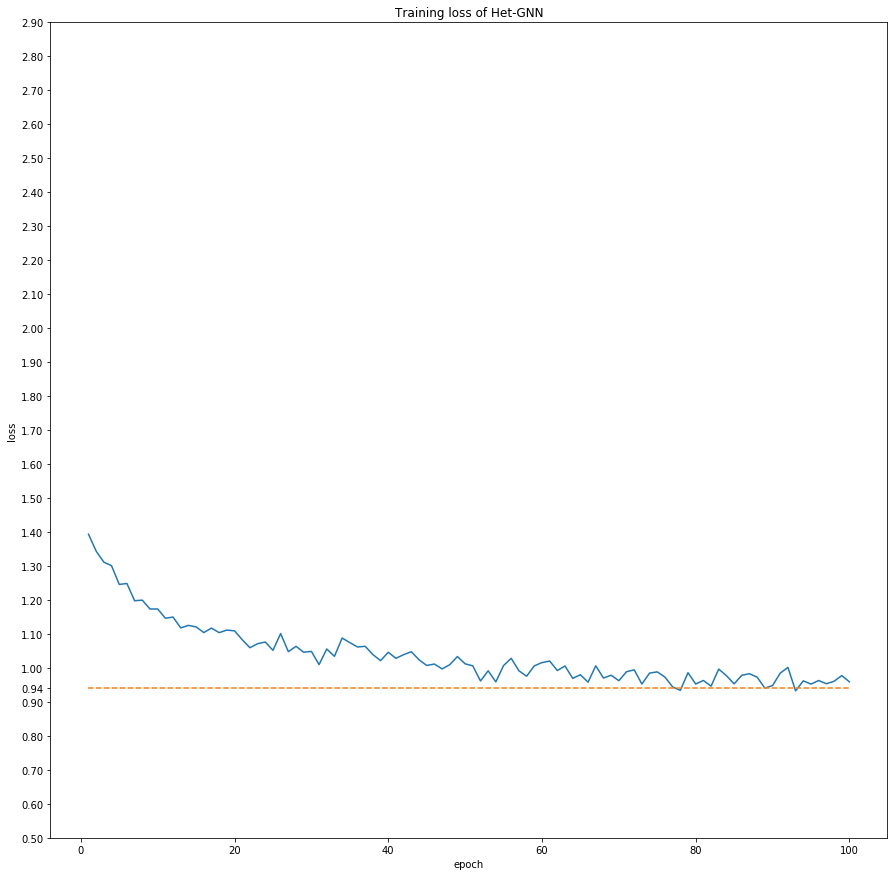

In [1248]:
yticks = list(np.arange(0.5,3,0.1))
yticks.insert(6,0.94)
yticks
plt.figure(figsize = (15,15))
plt.plot(range(1,101),loss_ls)
plt.plot(range(1,101),[0.94]*100,linestyle='--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss of Het-GNN')
plt.yticks(yticks)

In [905]:
embed_file = open("het_node_embedding.txt", "r")
embedding = []
for line in embed_file:
    line = line.strip()
    embed = []
    v = re.split(' ', line)
    for i in range(1,len(v)):
            embed.append(v[i])
    embedding.append(embed)

In [906]:
len(embedding)

4251

In [907]:
column_name = []
for i in range(64):
    column_name.append('V'+str(i))

In [908]:
hetgnn_embedding = pd.DataFrame(embedding,columns = column_name)
for column in hetgnn_embedding.columns:
    hetgnn_embedding[column] = pd.to_numeric(hetgnn_embedding[column])
hetgnn_embedding['node_id'] = range(0,4251)

In [909]:
feature_with_hetgnn = pd.merge(basic_feature,hetgnn_embedding,how = 'left',left_on = 'driver_id',right_on='node_id')
feature_with_hetgnn = pd.merge(feature_with_hetgnn,hetgnn_embedding,
                                 how = 'left',left_on = 'user_id',right_on='node_id')

In [1027]:
X_train,X_test, y_train, y_test =train_test_split(feature_with_hetgnn.drop(['order_id','user_id','driver_id','label','node_id_y','node_id_x'],axis = 1),
                                                  feature_with_hetgnn['label'],
                                                  test_size=0.3,random_state=48)
model = xgb.XGBClassifier(max_depth=4, n_estimators=500, learn_rate=0.01)
model.fit(X_train, y_train) 
test_score = model.score(X_test, y_test)
print('test_score: {0}'.format(test_score))
print('auc:',roc_auc_score(y_test,model.predict(X_test),))
print('f1:',f1_score(y_test,model.predict(X_test)))
print('recall:',recall_score(y_test,model.predict(X_test)))

test_score: 0.8392603129445235
auc: 0.8369820040141
f1: 0.8636911942098915
recall: 0.8483412322274881


In [983]:
temp_df = order[['order_id','label']]
for i in range(len(temp_df)):
    if temp_df.label[i] == '同伙1' or temp_df.label[i] == '同伙2':
        temp_df['label'][i] = '同伙'
    if temp_df.label[i] == '同人' or temp_df.label[i] == '没跑':
        temp_df['label'][i] = '现有检测出的假跑'

/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/wangweiren/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [997]:
test_label_df = pd.merge(feature_with_hetgnn[['order_id','label']].iloc[list(y_test.index)],temp_df.drop_duplicates(),how = 'left',on = 'order_id')

In [998]:
for order_id in list(test_label_df.order_id.value_counts().index[test_label_df.order_id.value_counts()>1]):
    index = test_label_df[test_label_df.order_id == order_id][test_label_df[test_label_df.order_id == order_id].label_y == '同伙'].index
    test_label_df.drop(index,axis = 0,inplace = True)

In [999]:
y_pred = model.predict(X_test)
test_label_df['y_pred'] = y_pred

In [1000]:
test_label_df = pd.merge(feature_with_hetgnn[['order_id','label']].iloc[list(y_test.index)],temp_df.drop_duplicates(),how = 'left',on = 'order_id')
for order_id in list(test_label_df.order_id.value_counts().index[test_label_df.order_id.value_counts()>1]):
    index = test_label_df[test_label_df.order_id == order_id][test_label_df[test_label_df.order_id == order_id].label_y == '同伙'].index
    test_label_df.drop(index,axis = 0,inplace = True)
y_pred = model.predict(X_test)
test_label_df['y_pred'] = y_pred
true = test_label_df[test_label_df.label_y != 'gang'].label_x
pred = test_label_df[test_label_df.label_y != 'gang'].y_pred
print('对于现有策略能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略能查出的,recall ：',recall_score(true,pred))
true = test_label_df[test_label_df.label_y != '现有检测出的'].label_x
pred = test_label_df[test_label_df.label_y != '现有检测出的'].y_pred
print('对于现有策略不能查出的,acc ：',accuracy_score(true,pred))
print('对于现有策略不能查出的,recall ：',recall_score(true,pred))

对于现有策略能查出的,acc ： 0.9213861386138614
对于现有策略能查出的,recall ： 0.90625
对于现有策略不能查出的,acc ： 0.8963331941544885
对于现有策略不能查出的,recall ： 0.8782828282828283
